In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
base_dir = r"C:\Users\Maryl\Downloads\INST 414"
file_name = "breast-cancer.csv"

In [3]:
full_path = os.path.join(base_dir, file_name)

In [4]:
data = pd.read_csv(full_path)

In [5]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


data.shape

data.describe()

data.columns

#data dictionary 
data_dict = {'id': "categorical variable to uniquely identifiy each row",
             'diagnosis' : "Categorical variable for the diagnosis of the breast tissue. M means malignant and B means benign. This variable is the Target feature.",
             'radius_mean' : "Mean of distances from center to points on the perimeter. Continuous variable",
             'texture_mean' : "Standard deviation of gray-scale values. Continuous variable",
             'perimeter_mean' : "Mean size of the core tumor. Continuous variable",
             'area_mean' : " ",
             'smoothness_mean' : "Mean of local variation in radius lengths. Continuous variable",
             'compactness_mean' : "Mean of perimeter^2 / area - 1.0. Continuous variable",
             'concavity_mean' : "Mean of severity of concave portions of the contour. Continuous variable",
             'concave points_mean' : "Mean for number of concave portions of the contour. Continuous variable",
             'symmetry_mean' : " ",
             'fractal_dimension_mean' : "Mean for 'costline approximation' - 1. Continuous variable",
             'radius_se' : "standard error for the mean distances from the center to points on the perimeter. Continuous variable",
             'texture_se' : "standard error for standard deviation of gray-scale values. Continuous variable",
             'perimeter_se' : " ",
             'area_se' : " ",
             'smoothness_se' : "standard error for local variation in radius lengths. Continuous variable",
             'compactness_se' : "standard error for perimeter^2/area -1.0. Continuous variable",
             'concavity_se' : "standard error for severity of concave portions of the contour. Continuous variable",
             'concave points_se' : "standard error  for number of concave portions of the contour. Continuous variable",
             'symmetry_se' : " ",
             'fractal_dimension_se' : " standard error for 'costline approximation' -1. Continuous variable",
             'radius_worst' : "'worst' or largest mean value for mean of distances from center to points on the perimeter. Continuous variable",
             'texture_worst' : " 'worst' or largest mean value for standard deviation of gray-scale values. Continuous variable",
             'perimeter_worst' : " ",
             'area_worst' : "" ,
             'smoothness_worst' : " 'worst' or larges mean value for local variation in radius lengths. Continuous variable",
             'compactness_worst' : " 'worst' or largest mean value for perimeter ^2/ area - 1.0. Continuous variable ",
             'concavity_worst' : " 'worst' or largests mean value for severity of concave potions of the contour. Continuous variable",
             'concave points_worst' : " 'worst' or largest mean value for number of concave portions of the contour. Continuous variable ",
             'symmetry_worst': " ",
             'fractal_dimension_worst' : " 'worse' or largets mean value for 'coastline approximation' -1. Continuous variable ",
    
}

In [10]:
data.drop('id', axis = 1, inplace = True)

There are 8 features that I was not able to find information on from Kaggle
area_mean, symmetry_mean, perimeter_se, area_se, symmetry_se, perimeter_worst, area-worst, symmetry_worst

#Data cleaning & preprocessing

#checking for the number of missing values in each feature
missing_values= data.isnull().sum()
print(missing_values)
    
# missing_count_total = df.isnull().sum().sum()
# print(missing_count_total)

#checking for outliers
def plot_boxplots(data, columns=None):
    # If columns not specified, use all columns except diagnosis'
    if columns is None:
        columns = [col for col in data.columns if col not in ['diagnosis']]
    
    for column in columns:
        sns.boxplot(x=data[column])
        plt.title(f'Boxplot of {column}')
        plt.show()

plot_boxplots(data)

def count_outliers(data, columns=None):
    # If columns not specified, use all columns except diagnosis'
    if columns is None:
        columns = [col for col in data.columns if col not in ['diagnosis']]
    
    outlier_counts = {}
    all_outlier_rows = set()
    
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
        all_outlier_rows.update(outliers.index)
    
    return outlier_counts, all_outlier_rows


outlier_counts, outlier_rows = count_outliers(data)

for column, count in outlier_counts.items():
    print(f"{column}: {count} outliers")

In [14]:
print(f"\nTotal number of rows containing at least one outlier: {len(outlier_rows)}")
print(f"Percentage of dataset with outliers: {len(outlier_rows)/len(data)*100:.2f}%")


Total number of rows containing at least one outlier: 171
Percentage of dataset with outliers: 30.05%


<Axes: >

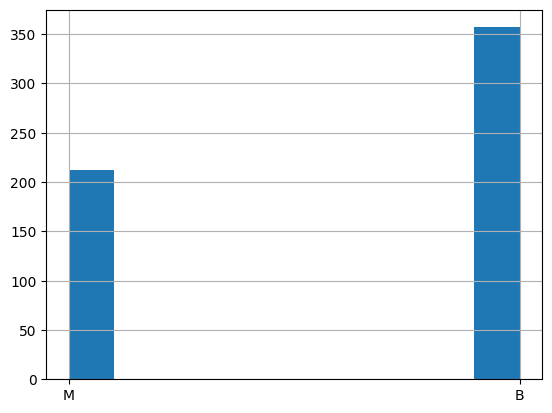

In [15]:
data["diagnosis"].hist()

In [16]:
def remove_outliers(data, columns=None):
    # Make a copy of the original data
    clean_data = data.copy()
    
    # If columns not specified, use all columns except diagnosis'
    if columns is None:
        columns = [col for col in data.columns if col not in ['diagnosis']]
    
    print(f"Original data shape: {data.shape}")
    
    # Keep track of rows to remove
    rows_to_drop = set()
    outlier_counts = {}
    
    for column in columns:
        Q1 = clean_data[column].quantile(0.25)
        Q3 = clean_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find indices of outliers
        outlier_indices = clean_data[(clean_data[column] < lower_bound) | 
                                    (clean_data[column] > upper_bound)].index
        
        # Add these indices to our set
        rows_to_drop.update(outlier_indices)
        
        # Count outliers per column
        outlier_counts[column] = len(outlier_indices)
    
    # Remove all rows with outliers
    clean_data = clean_data.drop(list(rows_to_drop))
    
    print(f"Number of rows with outliers: {len(rows_to_drop)}")
    print(f"Cleaned data shape: {clean_data.shape}")
    # print("\nOutliers per column:")
    # for column, count in outlier_counts.items():
    #     print(f"{column}: {count} outliers")
    
    return clean_data

# Call the function
clean_data = remove_outliers(data)

Original data shape: (569, 31)
Number of rows with outliers: 171
Cleaned data shape: (398, 31)


In [17]:
#Mapping the values in the Target Feature
#make the B 0 and the M 1 for the target feature 
data["diagnosis"].replace (["M", "B"], [1,0], inplace =True)

C:\Users\Maryl\AppData\Local\Temp\ipykernel_32980\2512708338.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["diagnosis"].replace (["M", "B"], [1,0], inplace =True)
C:\Users\Maryl\AppData\Local\Temp\ipykernel_32980\2512708338.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["diagnos

clean_data["diagnosis"].hist()

Removing the ouliers will remove the malignant rows, I will keep the outliers.

#Correlation Matix
matrix = data.corr()

# axis_corr = sns.heatmap(
#     data,
#     vmin = -1, vmax = 1, center =0,
#     cmap=sns.diverging_palette(50, 500, n=500),
#     square=True
# )
# plt.show()

dataframe = pd. DataFrame(data=data, columns=data.columns)
matrix = dataframe.corr()
plt.figure(figsize=(20,16))
sns.heatmap(matrix, cmap="coolwarm", annot=True)
plt.title("Correlation Matrix")
plt.show()

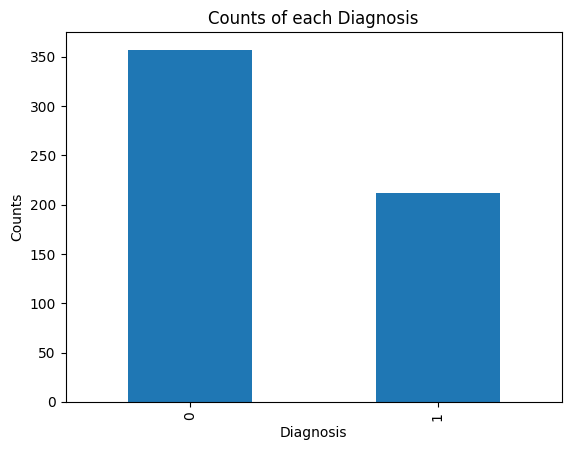

In [20]:
#bar plots for the target feature
diagnosis_counts = data["diagnosis"].value_counts()
diagnosis_counts


diagnosis_counts.plot(kind = "bar")
plt.title( "Counts of each Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Counts")
plt.show()

In [21]:
data["diagnosis"].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

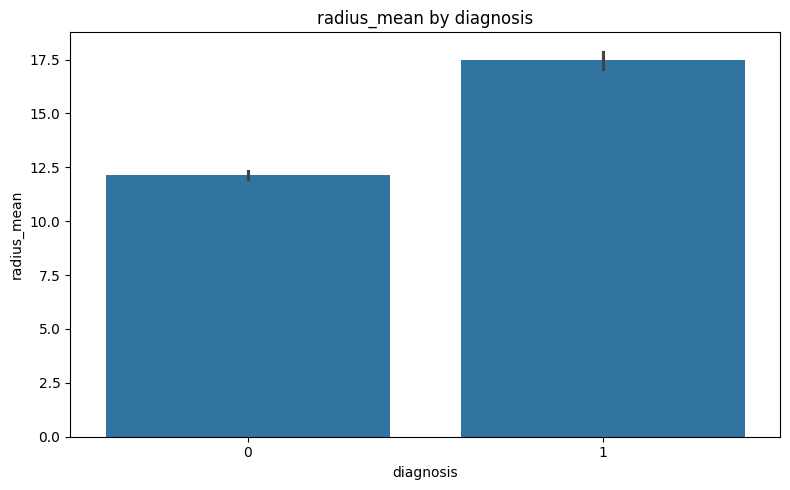

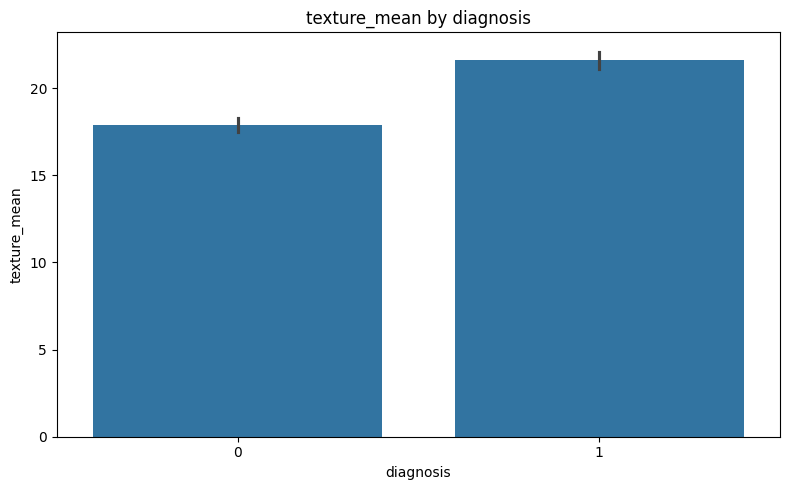

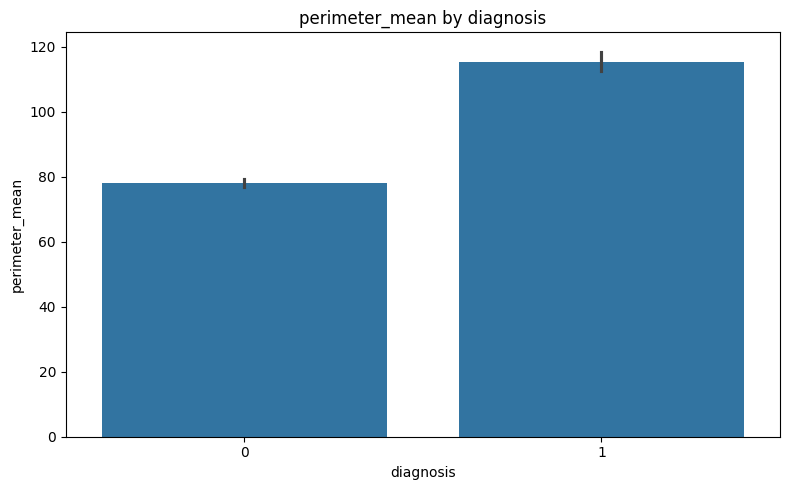

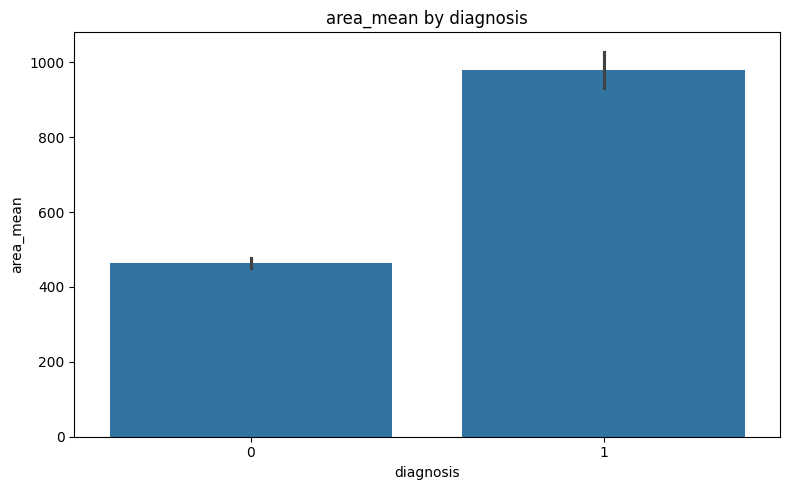

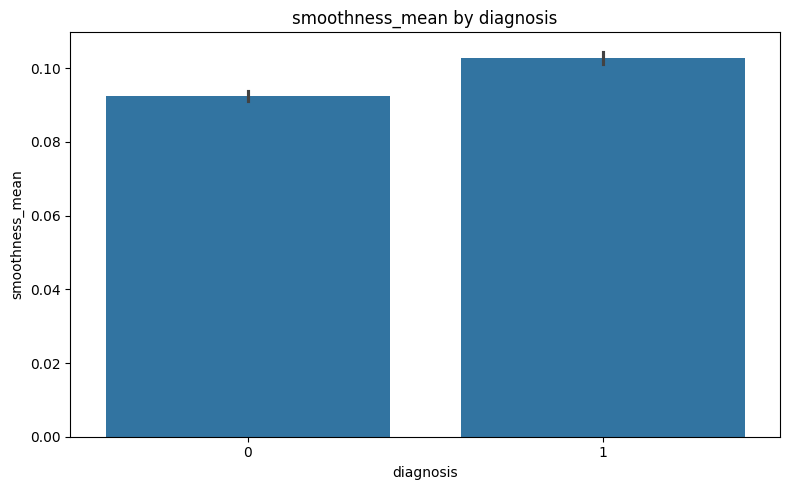

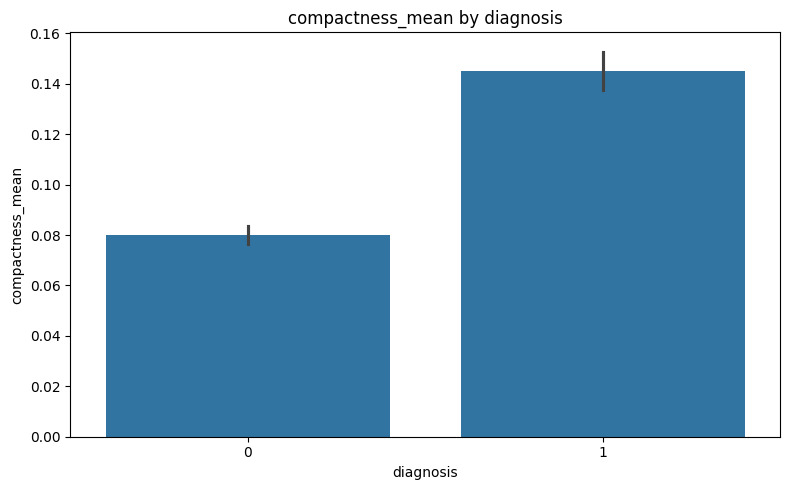

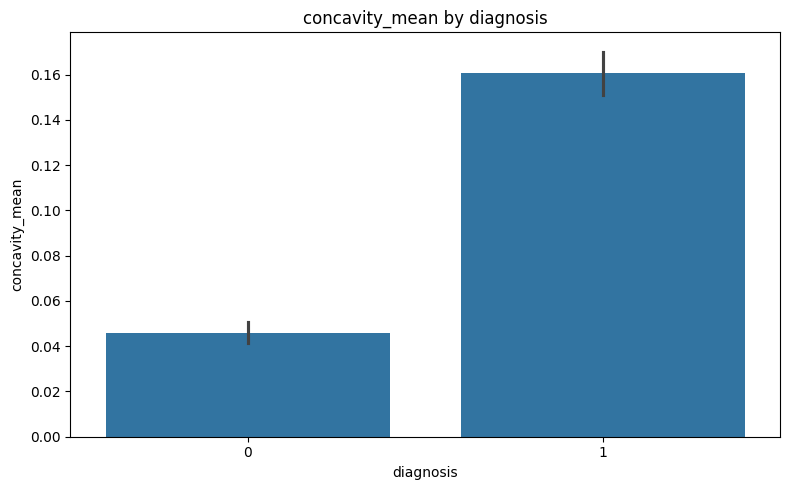

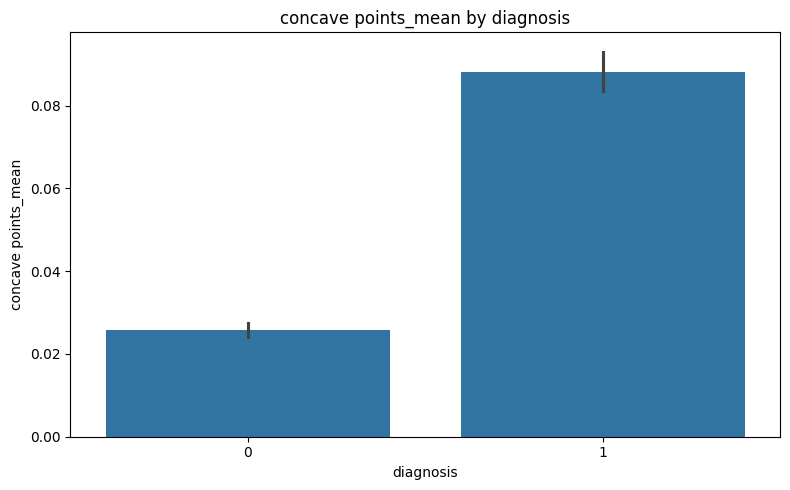

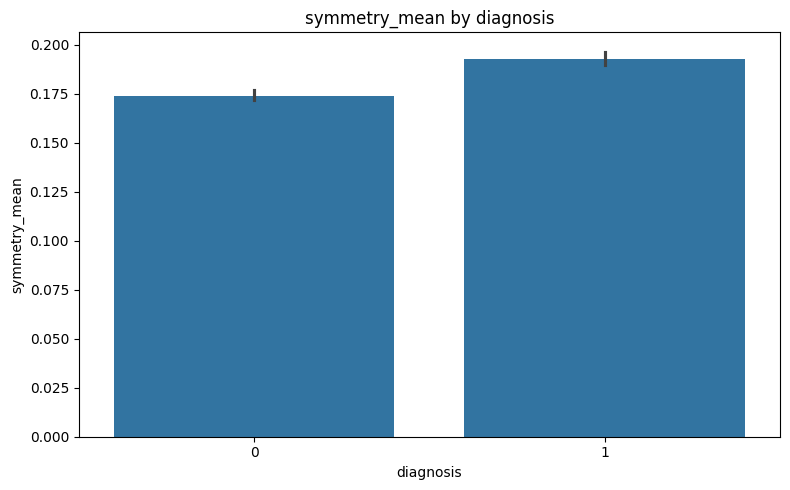

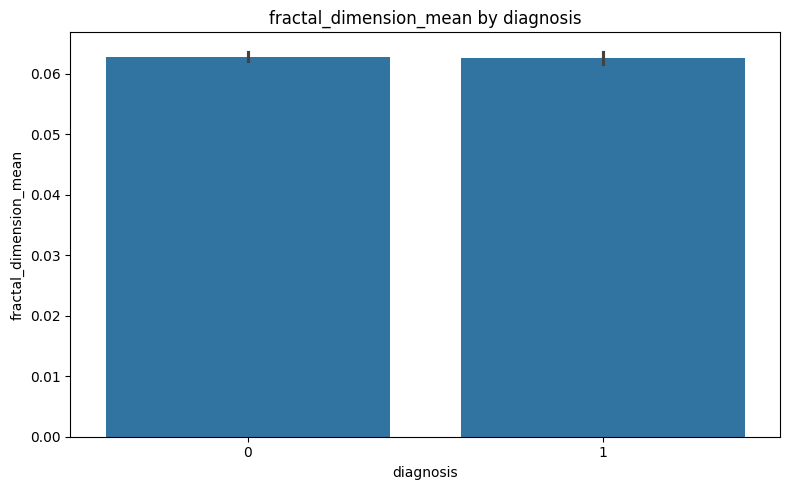

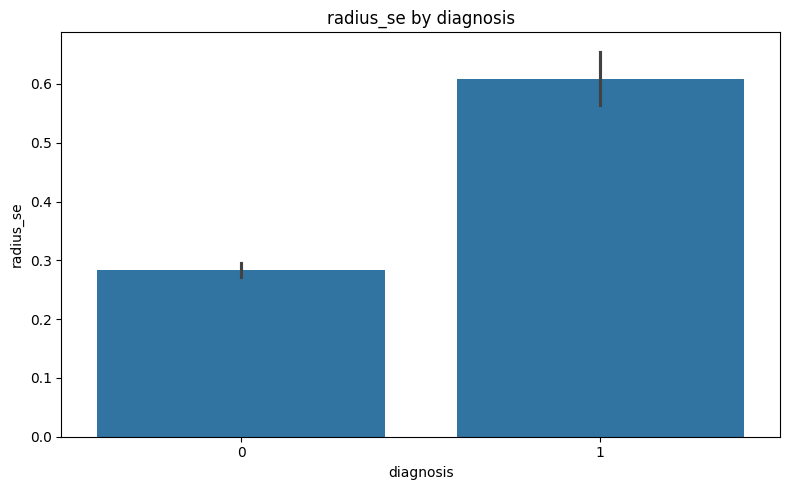

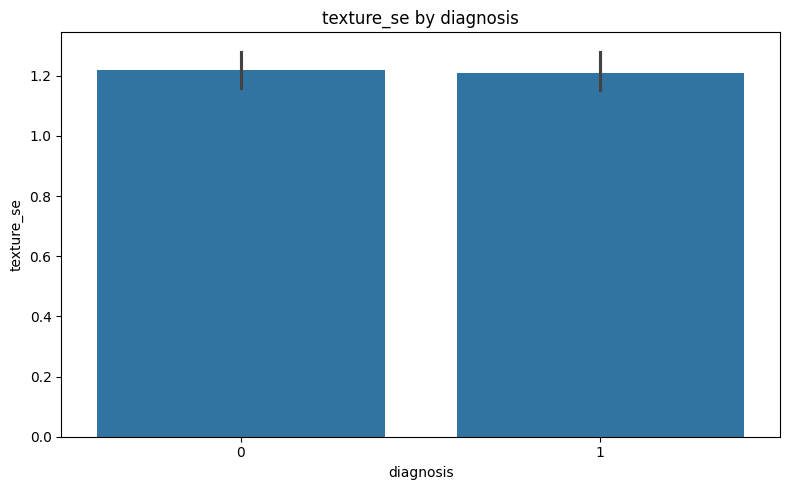

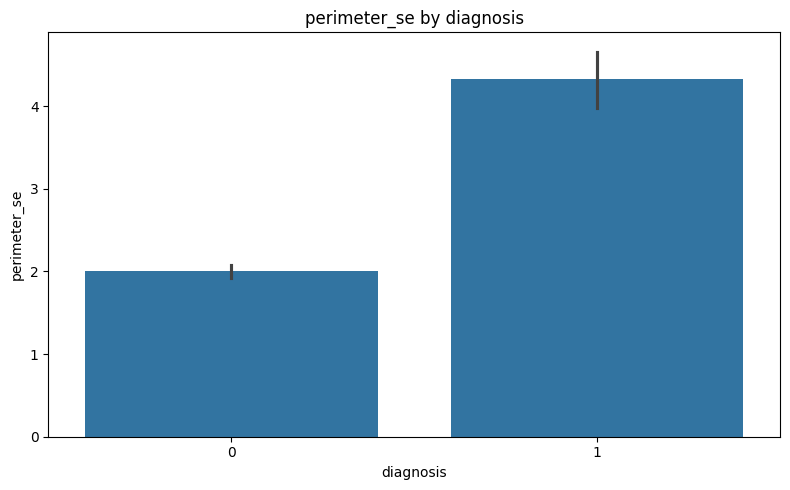

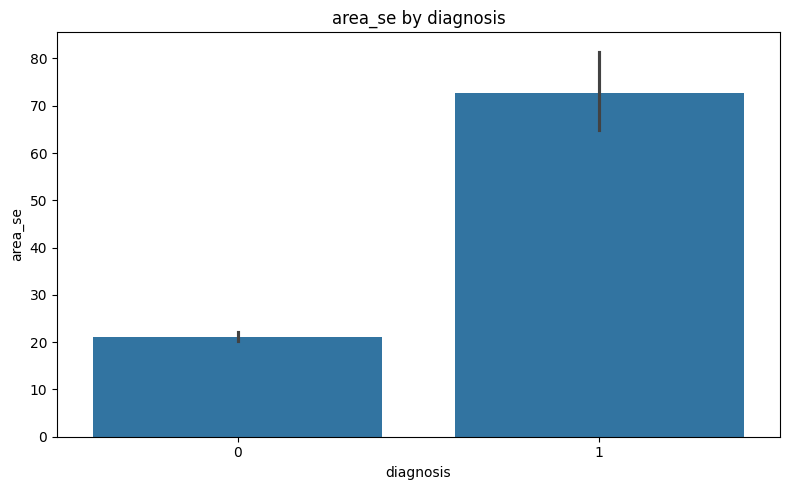

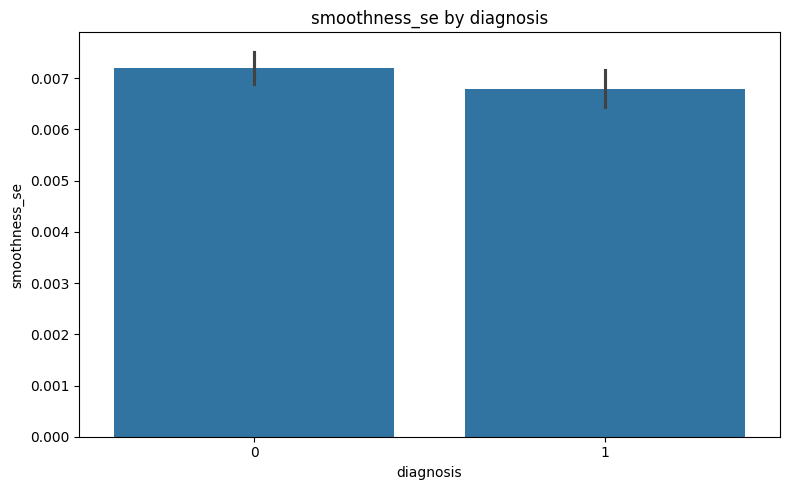

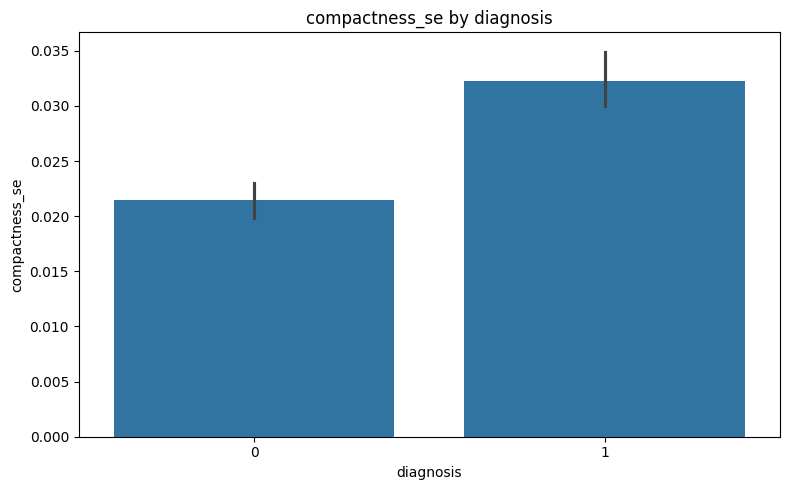

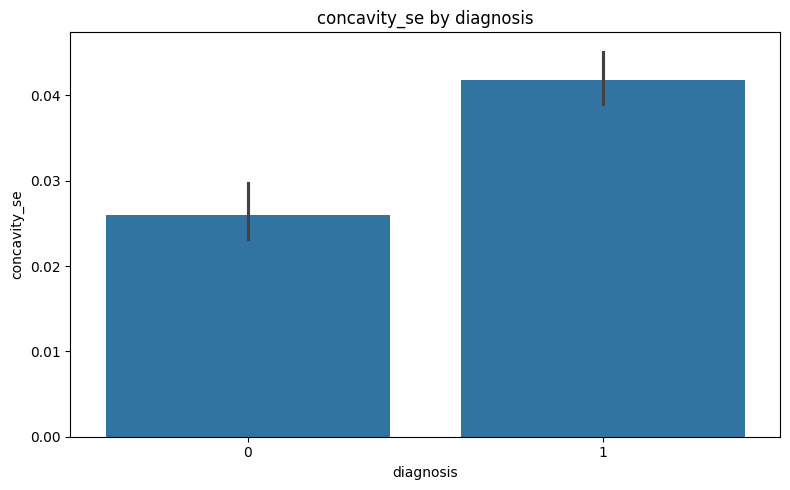

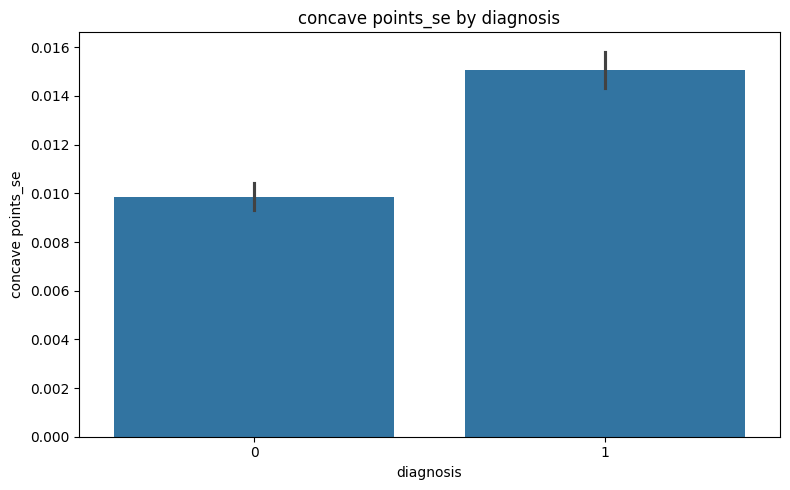

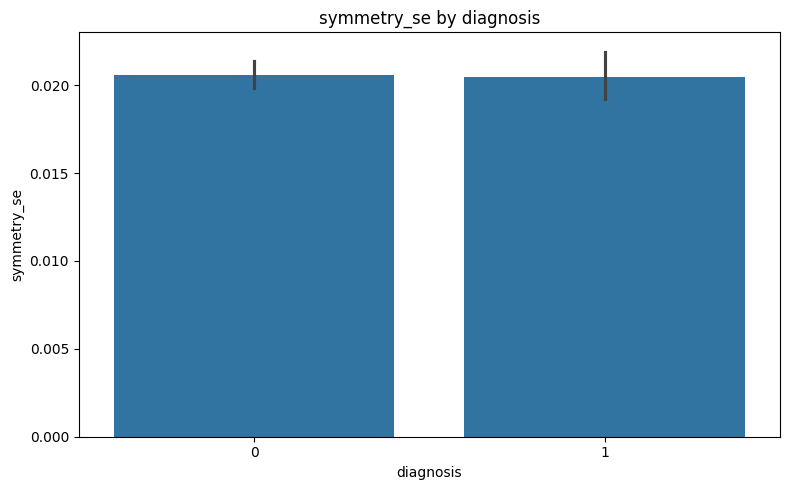

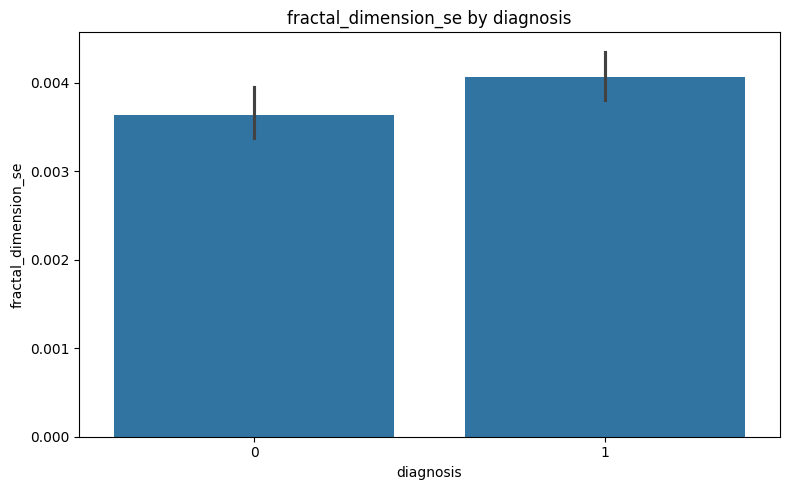

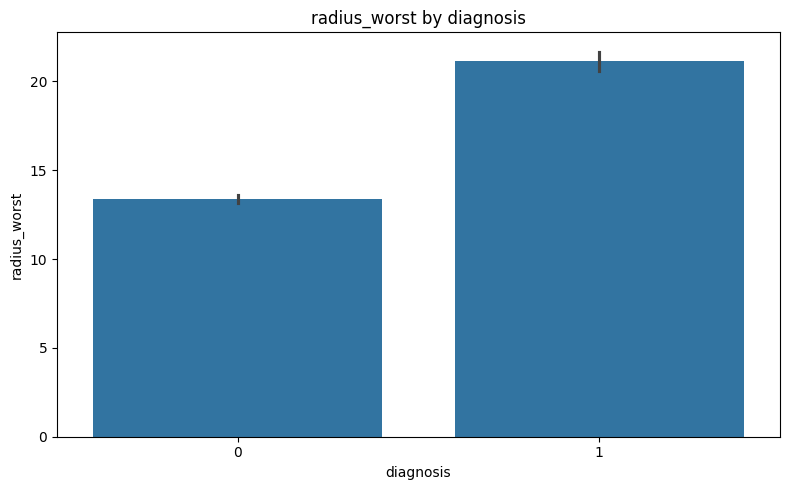

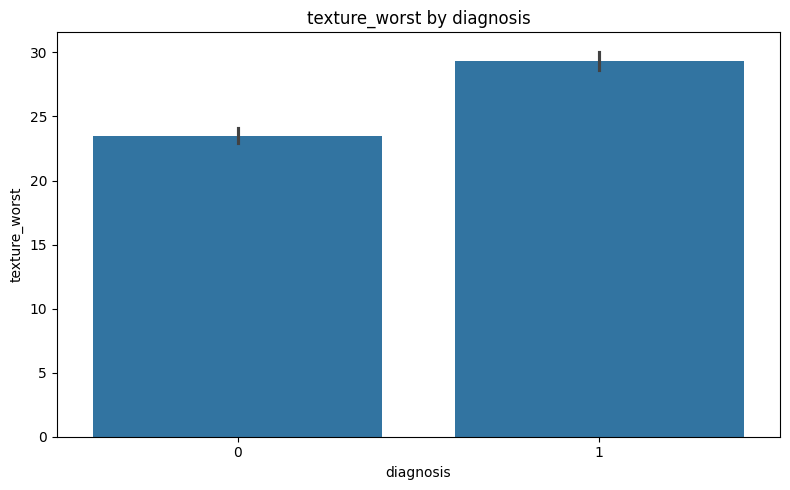

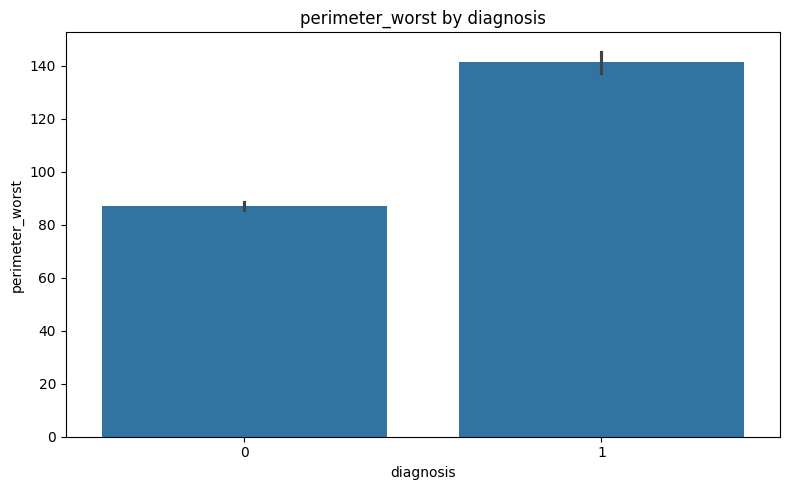

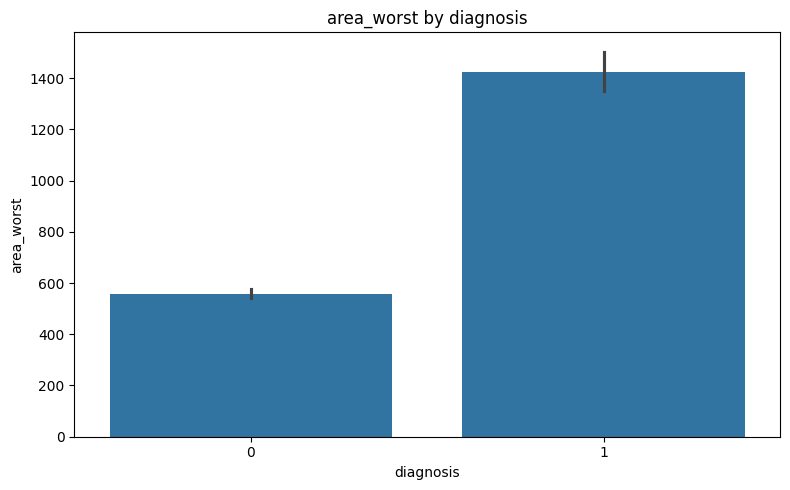

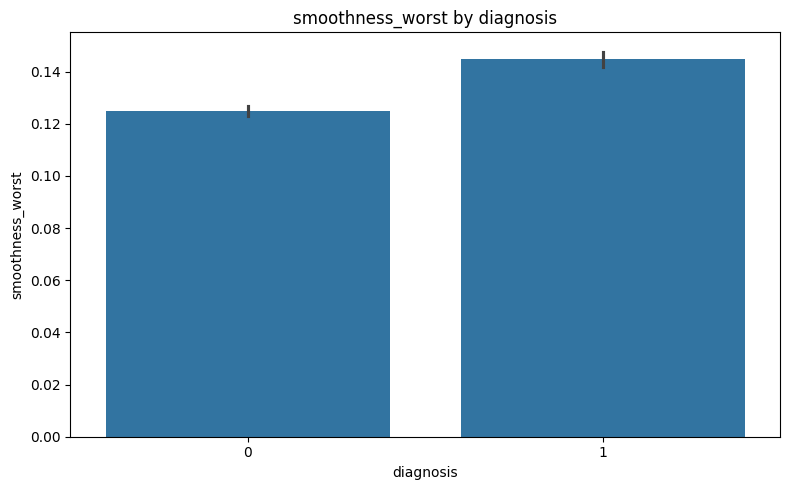

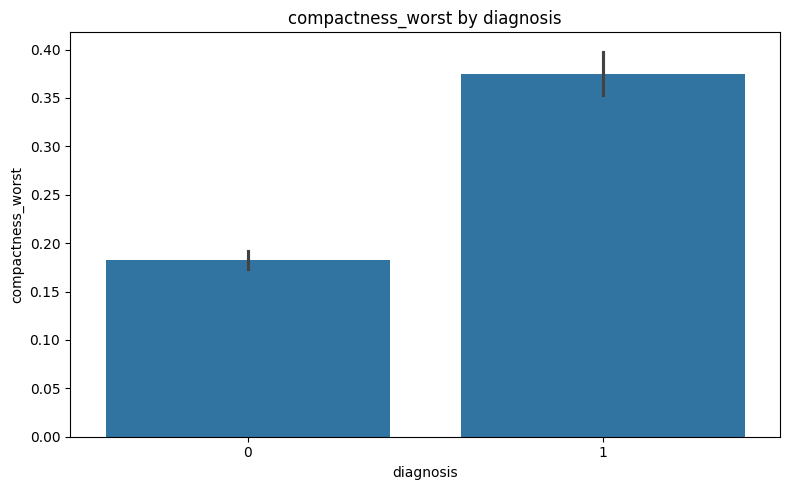

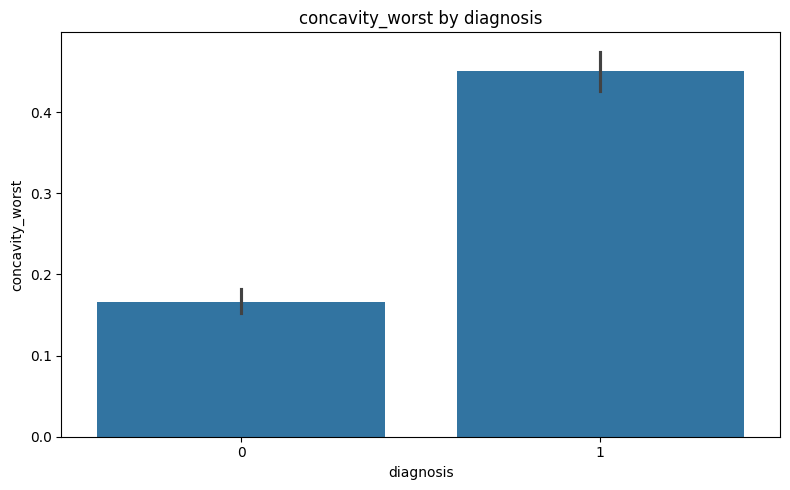

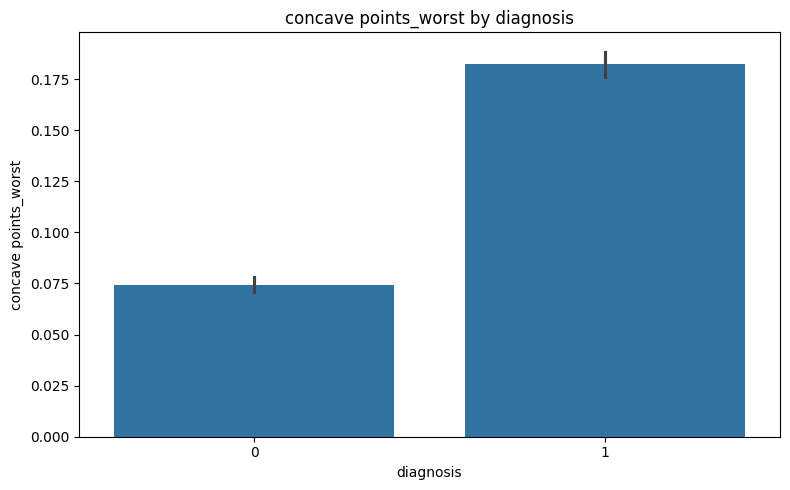

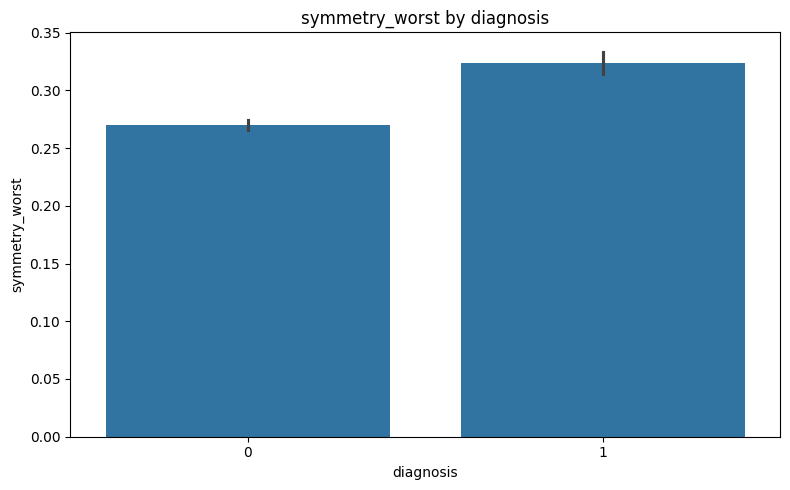

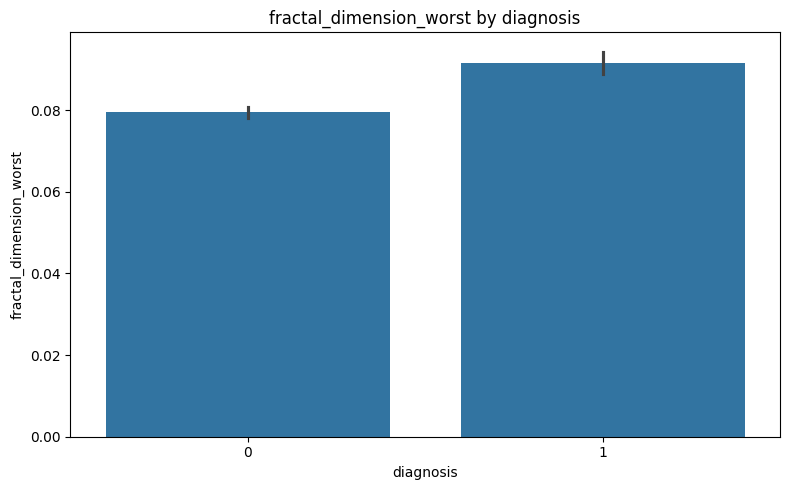

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'diagnosis' is your target column
target = 'diagnosis'  # Replace with your actual target column name

# Get all feature columns (excluding the target)
features = [col for col in data.columns if col != target]

# Create bar plots for each feature
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=target, y=feature, data=data)
    plt.title(f"{feature} by {target}")
    plt.tight_layout()
    plt.show()

# for column in data.columns:
#     diagnosis_counts.plot(kind = "bar")
#     plt.title( "Counts of each Diagnosis")
#     plt.xlabel("Diagnosis")
#     plt.ylabel("Counts")
#     plt.show()

target = 'diagnosis'  # Replace with your actual target column name

# Get all feature columns (excluding the target)
features = [col for col in data.columns if col != target]

# Create plots for each feature
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=target, y=feature, data=data)
    plt.title(f"{feature} by {target}")
    plt.tight_layout()
    plt.show()

In [24]:
mean_cols = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']



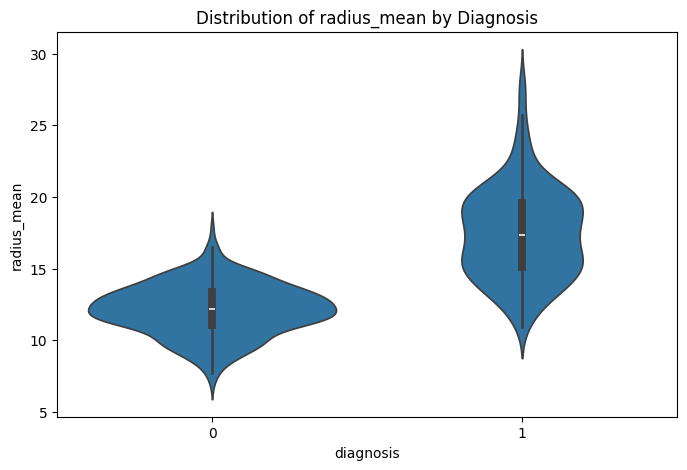

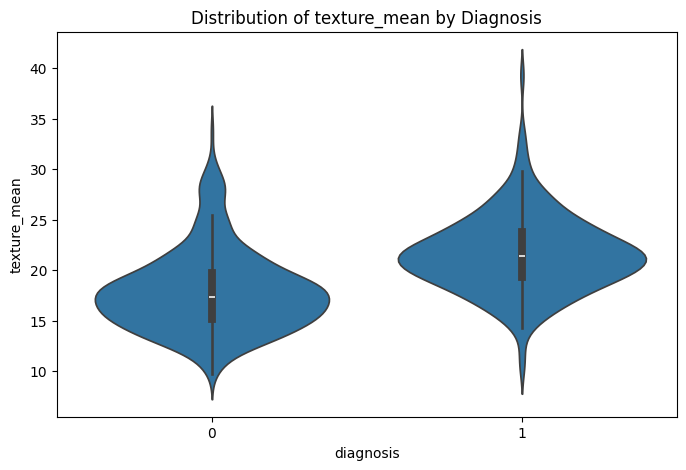

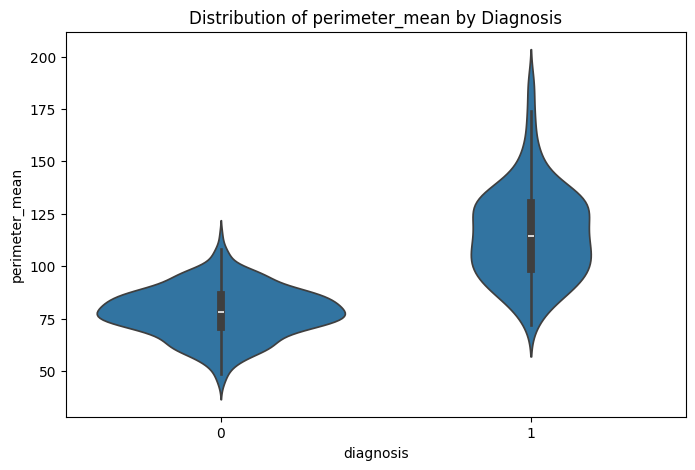

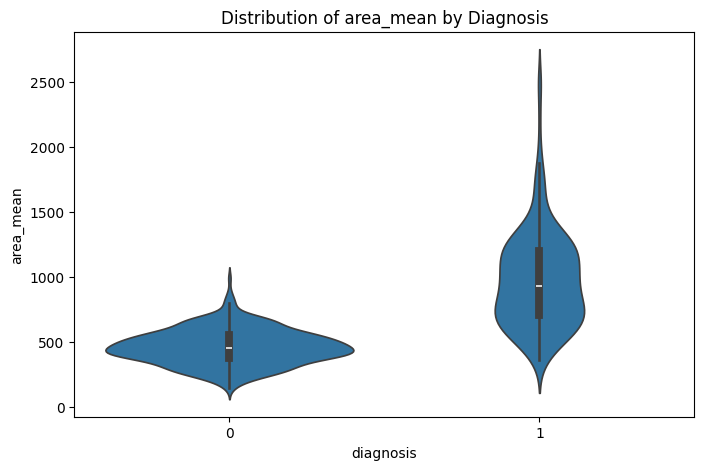

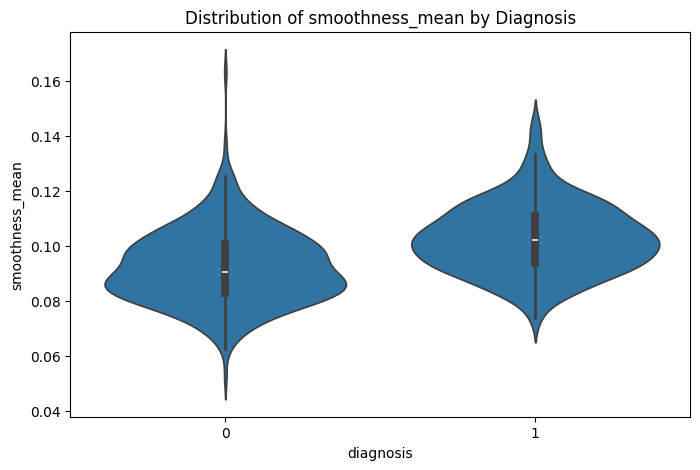

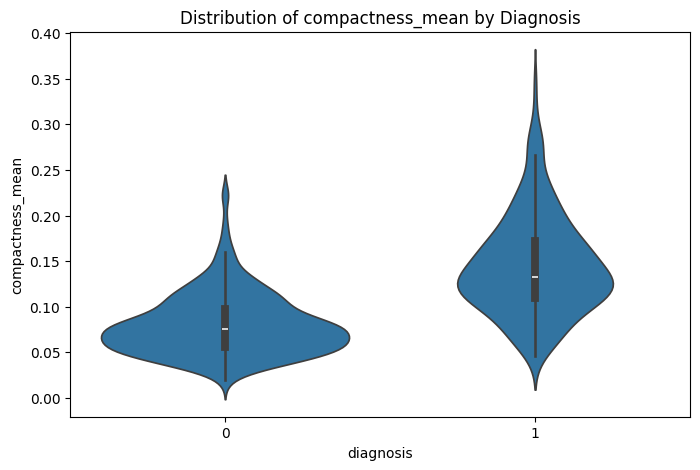

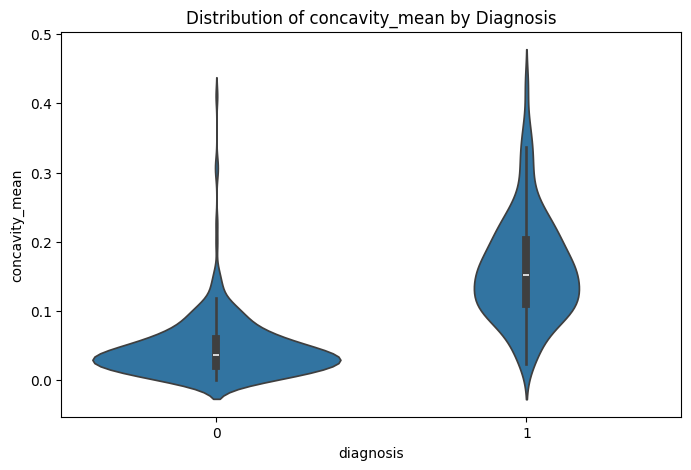

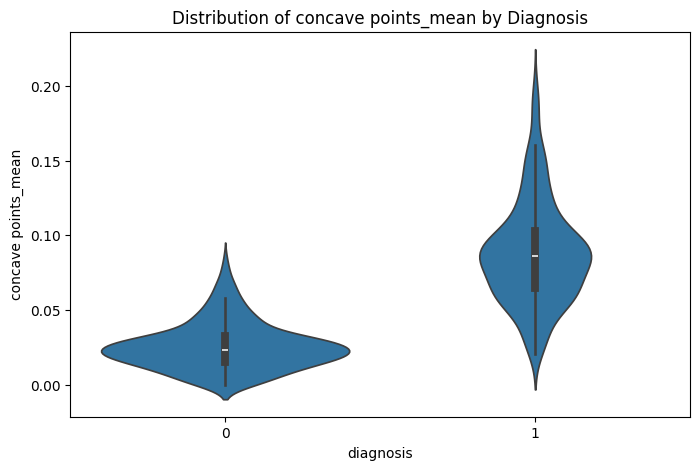

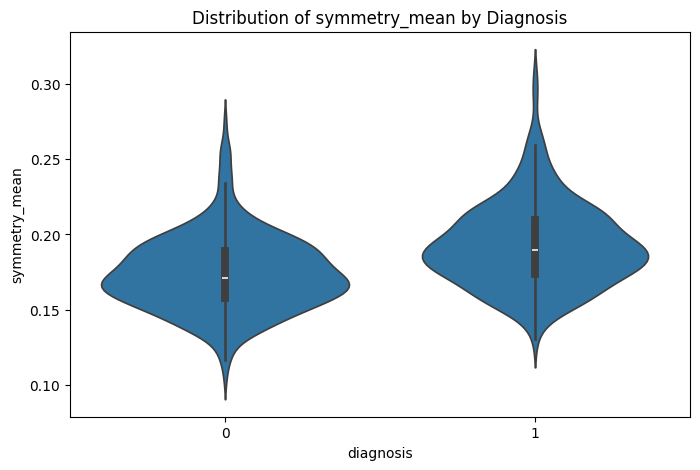

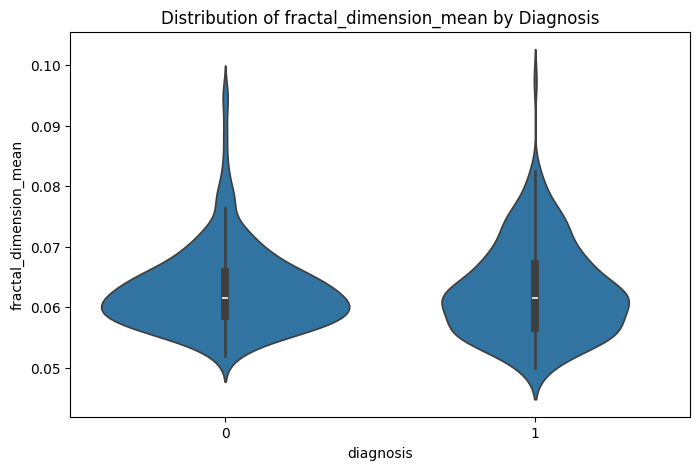

In [25]:
for feature in mean_cols[1:]:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x='diagnosis', y=feature, data=data)
    plt.title(f"Distribution of {feature} by Diagnosis")
    plt.show()

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca_means = pca.fit_transform(data[mean_cols[1:]])
pca_means_cols = ["PC1_means", "PC2_means"]
data_pca = data.copy()
data_pca[pca_means_cols] = X_pca_means

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca_means[:, 0], y=X_pca_means[:, 1], hue=data['diagnosis'])
plt.title('PCA of Mean Features')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [27]:
worse_cols = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']


pca = PCA(n_components=2)
X_pca_worse = pca.fit_transform(data[worse_cols[1:]])
pca_worse_cols = ["PC1_worse", "PC2_worse"]
data_pca[pca_worse_cols] = X_pca_worse

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca_worse[:, 0], y=X_pca_worse[:, 1], hue=data['diagnosis'])
plt.title('PCA of Worse Features')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [29]:
se_cols = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

pca = PCA(n_components=2)
X_pca_se = pca.fit_transform(data[se_cols[1:]])
pca_se_cols = ["PC1_se", "PC2_se"]
data_pca[pca_se_cols] = X_pca_se

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca_se[:, 0], y=X_pca_se [:, 1], hue=data['diagnosis'])
plt.title('PCA of Standard Error (SE) Features')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [31]:
# #Data Normalization
#note: do not standardize before splitting the data
# scaler = StandardScaler()
# scaler.fit(data)
# standardized_data = scaler.transform(data)
# standardized_data

In [32]:
data_pca. columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'PC1_means', 'PC2_means',
       'PC1_worse', 'PC2_worse', 'PC1_se', 'PC2_se'],
      dtype='object')

In [33]:
data_pca.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,PC1_means,PC2_means,PC1_worse,PC2_worse,PC1_se,PC2_se
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.7119,0.2654,0.4601,0.11890,347.389726,-3.450288,1140.978986,7.468413,113.204746,0.690344
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.2416,0.1860,0.2750,0.08902,672.360671,-6.224454,1076.619259,-11.828989,33.735343,-1.019933
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.4504,0.2430,0.3613,0.08758,549.459902,0.291601,829.672981,-3.324064,53.718366,-0.684875
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.6869,0.2575,0.6638,0.17300,-269.152753,4.105000,-312.841940,9.902188,-13.070909,0.994878
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.4000,0.1625,0.2364,0.07678,643.562714,-6.209533,695.842154,1.377358,54.163589,0.055323


In [34]:
X = data.drop("diagnosis", axis = 1)
y = data["diagnosis"]

In [35]:
from sklearn.model_selection import train_test_split

X_orig_train, X_orig_test, y_orig_train, y_orig_test = train_test_split(X, y, stratify=y, random_state=42)

In [36]:
# Then standardize using only information from the training set
scaler = StandardScaler()
X_orig_train = scaler.fit_transform(X_orig_train)  # Fit to training data and transform it
X_orig_test = scaler.transform(X_orig_test)

In [37]:
from sklearn.ensemble import RandomForestClassifier

feature_names = X.columns.tolist()
forest = RandomForestClassifier(random_state=0)
forest.fit(X_orig_train, y_orig_train)


RandomForestClassifier(random_state=0)

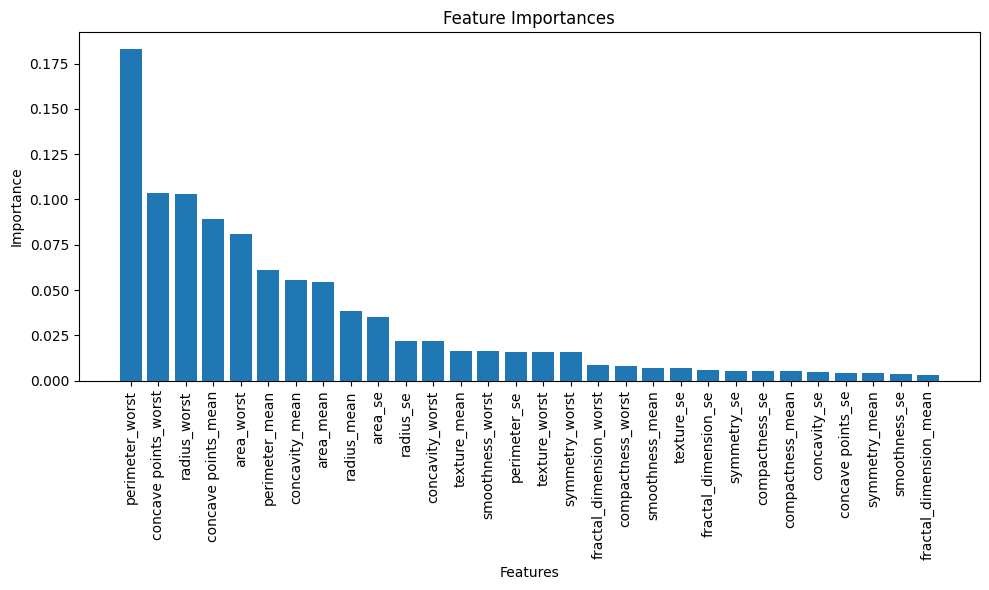

In [38]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = X.columns.tolist() 
orig_importances = forest.feature_importances_

indices = np.argsort(orig_importances)[::-1]



# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_orig_train.shape[1]), orig_importances[indices])
plt.xticks(range(X_orig_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


In [39]:
orig_feat_imp_df = pd.DataFrame({
    'Feature': [feature_names[i] for i in indices],
    'Importance': orig_importances[indices]
})


In [40]:
orig_feat_imp_df

,Feature,Importance
0,perimeter_worst,0.183059
1,concave points_worst,0.103635
2,radius_worst,0.103212
3,concave points_mean,0.088967
4,area_worst,0.080741
5,perimeter_mean,0.060833
6,concavity_mean,0.055708
7,area_mean,0.054680
8,radius_mean,0.038347
9,area_se,0.035351


In [41]:
# Print the top 10 most important features
print("Top 10 most important features in the original df:")
print(orig_feat_imp_df.head(10))

Top 10 most important features in the original df:
                Feature  Importance
0       perimeter_worst    0.183059
1  concave points_worst    0.103635
2          radius_worst    0.103212
3   concave points_mean    0.088967
4            area_worst    0.080741
5        perimeter_mean    0.060833
6        concavity_mean    0.055708
7             area_mean    0.054680
8           radius_mean    0.038347
9               area_se    0.035351


In [42]:
# X_pca = data_pca.drop("diagnosis", axis = 1)
# y_pca = data_pca["diagnosis"]

y_pca = data_pca.pop("diagnosis")
X_pca = data_pca

In [43]:
from sklearn.model_selection import train_test_split

X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y_pca, stratify=y, random_state=42)

In [44]:
pca_scaler = StandardScaler()
X_pca_train_scaled = scaler.fit_transform(X_pca_train)  # Fit to training data and transform it
X_pca_test_scaled = scaler.transform(X_pca_test)

In [45]:
from sklearn.ensemble import RandomForestClassifier

pca_feature_names = X_pca.columns.tolist()
pca_forest = RandomForestClassifier(random_state=42)
pca_forest.fit(X_pca_train_scaled, y_pca_train)

RandomForestClassifier(random_state=42)

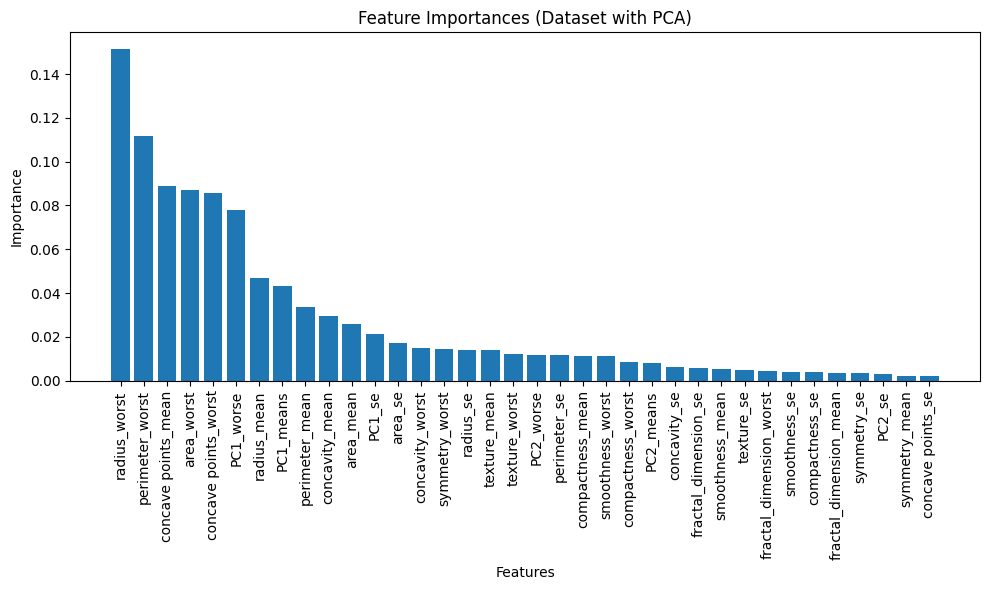

In [46]:
import matplotlib.pyplot as plt
import numpy as np

pca_importances = pca_forest.feature_importances_
pca_indices = np.argsort(pca_importances)[::-1]



# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_pca_train_scaled.shape[1]), pca_importances[pca_indices])
plt.xticks(range(X_pca_train_scaled.shape[1]), [pca_feature_names[i] for i in pca_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances (Dataset with PCA)')
plt.tight_layout()
plt.show()

In [47]:
pca_feature_importance_df = pd.DataFrame({
    'Feature': [pca_feature_names[i] for i in pca_indices],
    'Importance': pca_importances[pca_indices]
})
pca_feature_importance_df

,Feature,Importance
0,radius_worst,0.151479
1,perimeter_worst,0.111831
2,concave points_mean,0.088863
3,area_worst,0.087009
4,concave points_worst,0.085712
5,PC1_worse,0.077919
6,radius_mean,0.046866
7,PC1_means,0.043093
8,perimeter_mean,0.033441
9,concavity_mean,0.029698


In [48]:
print("Top 10 most important features:")
print(pca_feature_importance_df.head(10))

Top 10 most important features:
                Feature  Importance
0          radius_worst    0.151479
1       perimeter_worst    0.111831
2   concave points_mean    0.088863
3            area_worst    0.087009
4  concave points_worst    0.085712
5             PC1_worse    0.077919
6           radius_mean    0.046866
7             PC1_means    0.043093
8        perimeter_mean    0.033441
9        concavity_mean    0.029698


In [49]:
feat_imp_threshold = 0.01
imp_feats = pca_feature_importance_df[pca_feature_importance_df["Importance"] > feat_imp_threshold]["Feature"].tolist()
imp_feats

['radius_worst',
 'perimeter_worst',
 'concave points_mean',
 'area_worst',
 'concave points_worst',
 'PC1_worse',
 'radius_mean',
 'PC1_means',
 'perimeter_mean',
 'concavity_mean',
 'area_mean',
 'PC1_se',
 'area_se',
 'concavity_worst',
 'symmetry_worst',
 'radius_se',
 'texture_mean',
 'texture_worst',
 'PC2_worse',
 'perimeter_se',
 'compactness_mean',
 'smoothness_worst']

In [50]:
imp_feats_count = len(imp_feats)
imp_feats_count

22

In [51]:
df = data_pca[imp_feats]

In [52]:
df

,radius_worst,perimeter_worst,concave points_mean,area_worst,concave points_worst,PC1_worse,radius_mean,PC1_means,perimeter_mean,concavity_mean,...,area_se,concavity_worst,symmetry_worst,radius_se,texture_mean,texture_worst,PC2_worse,perimeter_se,compactness_mean,smoothness_worst
0,25.380,184.60,0.14710,2019.0,0.2654,1140.978986,17.99,347.389726,122.80,0.30010,...,153.40,0.7119,0.4601,1.0950,10.38,17.33,7.468413,8.589,0.27760,0.16220
1,24.990,158.80,0.07017,1956.0,0.1860,1076.619259,20.57,672.360671,132.90,0.08690,...,74.08,0.2416,0.2750,0.5435,17.77,23.41,-11.828989,3.398,0.07864,0.12380
2,23.570,152.50,0.12790,1709.0,0.2430,829.672981,19.69,549.459902,130.00,0.19740,...,94.03,0.4504,0.3613,0.7456,21.25,25.53,-3.324064,4.585,0.15990,0.14440
3,14.910,98.87,0.10520,567.7,0.2575,-312.841940,11.42,-269.152753,77.58,0.24140,...,27.23,0.6869,0.6638,0.4956,20.38,26.50,9.902188,3.445,0.28390,0.20980
4,22.540,152.20,0.10430,1575.0,0.1625,695.842154,20.29,643.562714,135.10,0.19800,...,94.44,0.4000,0.2364,0.7572,14.34,16.67,1.377358,5.438,0.13280,0.13740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,25.450,166.10,0.13890,2027.0,0.2216,1147.933932,21.56,825.644625,142.00,0.24390,...,158.70,0.4107,0.2060,1.1760,22.39,26.40,-8.016357,7.673,0.11590,0.14100
565,23.690,155.00,0.09791,1731.0,0.1628,851.827905,20.13,607.435813,131.20,0.14400,...,99.04,0.3215,0.2572,0.7655,28.25,38.25,1.431243,5.203,0.10340,0.11660
566,18.980,126.70,0.05302,1124.0,0.1418,244.176368,16.60,203.898286,108.30,0.09251,...,48.55,0.3403,0.2218,0.4564,28.08,34.12,7.342690,3.425,0.10230,0.11390
567,25.740,184.60,0.15200,1821.0,0.2650,943.401499,20.60,612.040133,140.10,0.35140,...,86.22,0.9387,0.4087,0.7260,29.33,39.42,25.041291,5.772,0.27700,0.16500


In [53]:
df.loc[:, "diagnosis"] = y

C:\Users\Maryl\AppData\Local\Temp\ipykernel_32980\661861265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "diagnosis"] = y


In [54]:
df

,radius_worst,perimeter_worst,concave points_mean,area_worst,concave points_worst,PC1_worse,radius_mean,PC1_means,perimeter_mean,concavity_mean,...,concavity_worst,symmetry_worst,radius_se,texture_mean,texture_worst,PC2_worse,perimeter_se,compactness_mean,smoothness_worst,diagnosis
0,25.380,184.60,0.14710,2019.0,0.2654,1140.978986,17.99,347.389726,122.80,0.30010,...,0.7119,0.4601,1.0950,10.38,17.33,7.468413,8.589,0.27760,0.16220,1
1,24.990,158.80,0.07017,1956.0,0.1860,1076.619259,20.57,672.360671,132.90,0.08690,...,0.2416,0.2750,0.5435,17.77,23.41,-11.828989,3.398,0.07864,0.12380,1
2,23.570,152.50,0.12790,1709.0,0.2430,829.672981,19.69,549.459902,130.00,0.19740,...,0.4504,0.3613,0.7456,21.25,25.53,-3.324064,4.585,0.15990,0.14440,1
3,14.910,98.87,0.10520,567.7,0.2575,-312.841940,11.42,-269.152753,77.58,0.24140,...,0.6869,0.6638,0.4956,20.38,26.50,9.902188,3.445,0.28390,0.20980,1
4,22.540,152.20,0.10430,1575.0,0.1625,695.842154,20.29,643.562714,135.10,0.19800,...,0.4000,0.2364,0.7572,14.34,16.67,1.377358,5.438,0.13280,0.13740,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,25.450,166.10,0.13890,2027.0,0.2216,1147.933932,21.56,825.644625,142.00,0.24390,...,0.4107,0.2060,1.1760,22.39,26.40,-8.016357,7.673,0.11590,0.14100,1
565,23.690,155.00,0.09791,1731.0,0.1628,851.827905,20.13,607.435813,131.20,0.14400,...,0.3215,0.2572,0.7655,28.25,38.25,1.431243,5.203,0.10340,0.11660,1
566,18.980,126.70,0.05302,1124.0,0.1418,244.176368,16.60,203.898286,108.30,0.09251,...,0.3403,0.2218,0.4564,28.08,34.12,7.342690,3.425,0.10230,0.11390,1
567,25.740,184.60,0.15200,1821.0,0.2650,943.401499,20.60,612.040133,140.10,0.35140,...,0.9387,0.4087,0.7260,29.33,39.42,25.041291,5.772,0.27700,0.16500,1


In [55]:
X = df.drop("diagnosis", axis = 1)
y = df["diagnosis"]

In [55]:
X = df.drop("diagnosis", axis = 1)
y = df["diagnosis"]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [57]:
from sklearn.pipeline import Pipeline
preprocessor = Pipeline([
    ('scaler', StandardScaler())
])

In [58]:
rf_pipeline = Pipeline([
     ('preprocessor', preprocessor),
     ('classifier', RandomForestClassifier(n_estimators = 100, max_depth =7, min_samples_split = 6, min_samples_leaf = 55, random_state=42))
])
    

In [59]:

from xgboost import XGBClassifier
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(learning_rate= 0.3, n_estimators = 150, min_samples_split = 4, min_samples_leaf = 2, max_depth = 5, random_state=42))
])

In [60]:
rf_param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [5, 7, 9],
    'classifier__min_samples_split': [2, 6, 10],
    'classifier__min_samples_leaf': [1, 5, 10]
}

xgb_param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.3],
    'classifier__min_samples_split': [2, 4, 6]
}


In [61]:
def nested_cross_validation(pipeline, param_grid, X, y, outer_cv=5, inner_cv=3):
    """
    Perform nested cross-validation for model evaluation.
    
    Parameters:
    -----------
    pipeline : sklearn Pipeline
        The pipeline to evaluate (containing preprocessor and classifier)
    param_grid : dict
        Parameter grid for hyperparameter tuning
    X : array-like
        Feature data
    y : array-like
        Target data
    outer_cv : int, default=5
        Number of folds for outer cross-validation
    inner_cv : int, default=3
        Number of folds for inner cross-validation
    
    Returns:
    --------
    dict
        Dictionary containing results of nested cross-validation
    """
    # Convert inputs to numpy arrays if they aren't already
    X = np.array(X)
    y = np.array(y)
    
    # Initialize outer cross-validation
    outer_cv_split = KFold(n_splits=outer_cv, shuffle=True, random_state=42)
    
    # Store outer fold results
    outer_scores = []
    best_params_list = []
    all_models = []
    
    print(f"\nStarting nested cross-validation with {outer_cv} outer folds and {inner_cv} inner folds")
    
    # Outer loop
    for fold_idx, (train_idx, test_idx) in enumerate(outer_cv_split.split(X)):
        print(f"\nOuter Fold {fold_idx+1}/{outer_cv}")
        
        # Split data for current fold
        X_train_fold, X_test_fold = X[train_idx], X[test_idx]
        y_train_fold, y_test_fold = y[train_idx], y[test_idx]
        
        # Inner loop for hyperparameter tuning
        grid_search = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            cv=inner_cv,
            scoring='accuracy',
            n_jobs=-1,
            verbose=0,
            refit=True
        )
        
        # Fit grid search to training data
        grid_search.fit(X_train_fold, y_train_fold)
        
        # Store best model from this fold
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        all_models.append(best_model)
        best_params_list.append(best_params)
        
        # Evaluate the best model on test data
        y_pred = best_model.predict(X_test_fold)
        fold_score = accuracy_score(y_test_fold, y_pred)
        outer_scores.append(fold_score)
        
        print(f"  Best parameters: {best_params}")
        print(f"  Validation accuracy: {grid_search.best_score_:.4f}")
        print(f"  Test accuracy: {fold_score:.4f}")
    
    # Calculate and return statistics
    mean_accuracy = np.mean(outer_scores)
    std_accuracy = np.std(outer_scores)
    
    print(f"\nNested CV Results:")
    print(f"Mean Test Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
    print(f"Test Accuracy Range: [{min(outer_scores):.4f}, {max(outer_scores):.4f}]")
    
    return {
        'mean_accuracy': mean_accuracy,
        'std_accuracy': std_accuracy,
        'all_scores': outer_scores,
        'best_params': best_params_list,
        'models': all_models
    }


In [62]:
# Run nested CV for both models (instead of your existing simple CV)
from sklearn.model_selection import KFold, GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score


print("Evaluating Random Forest with Nested Cross-Validation")
rf_results = nested_cross_validation(rf_pipeline, rf_param_grid, X_train, y_train)

print("\nEvaluating XGBoost with Nested Cross-Validation")
xgb_results = nested_cross_validation(xgb_pipeline, xgb_param_grid, X_train, y_train)

# Compare model performances
print("\nModel Comparison:")
print(f"Random Forest: {rf_results['mean_accuracy']:.4f} ± {rf_results['std_accuracy']:.4f}")
print(f"XGBoost: {xgb_results['mean_accuracy']:.4f} ± {xgb_results['std_accuracy']:.4f}")

Evaluating Random Forest with Nested Cross-Validation

Starting nested cross-validation with 5 outer folds and 3 inner folds

Outer Fold 1/5
  Best parameters: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
  Validation accuracy: 0.9618
  Test accuracy: 0.9419

Outer Fold 2/5
  Best parameters: {'classifier__max_depth': 7, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
  Validation accuracy: 0.9590
  Test accuracy: 0.9412

Outer Fold 3/5
  Best parameters: {'classifier__max_depth': 7, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
  Validation accuracy: 0.9589
  Test accuracy: 0.9882

Outer Fold 4/5
  Best parameters: {'classifier__max_depth': 7, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 150}
  Validation accuracy: 0.9531
  Test accu

C:\Users\Maryl\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:53:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Best parameters: {'classifier__learning_rate': 0.3, 'classifier__max_depth': 3, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
  Validation accuracy: 0.9707
  Test accuracy: 0.9535

Outer Fold 2/5


C:\Users\Maryl\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:53:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Best parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 150}
  Validation accuracy: 0.9619
  Test accuracy: 0.9294

Outer Fold 3/5


C:\Users\Maryl\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:53:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Best parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
  Validation accuracy: 0.9677
  Test accuracy: 1.0000

Outer Fold 4/5


C:\Users\Maryl\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:53:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Best parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
  Validation accuracy: 0.9707
  Test accuracy: 0.9765

Outer Fold 5/5
  Best parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
  Validation accuracy: 0.9589
  Test accuracy: 0.9765

Nested CV Results:
Mean Test Accuracy: 0.9672 ± 0.0239
Test Accuracy Range: [0.9294, 1.0000]

Model Comparison:
Random Forest: 0.9554 ± 0.0227
XGBoost: 0.9672 ± 0.0239


C:\Users\Maryl\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:53:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [63]:
def plot_model_accuracy_comparison(rf_results, xgb_results):
    # Extract accuracy scores and standard deviations
    models = ['Random Forest', 'XGBoost']
    accuracies = [rf_results['mean_accuracy'], xgb_results['mean_accuracy']]
    std_devs = [rf_results['std_accuracy'], xgb_results['std_accuracy']]
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Set bar positions
    bar_positions = np.arange(len(models))
    
    # Create bars
    bars = ax.bar(bar_positions, accuracies, yerr=std_devs, 
                  align='center', alpha=0.7, capsize=10,
                  color=['orange', 'green'], ecolor='black')
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.4f}', ha='center', va='bottom', 
                fontsize=14, fontweight='bold', color = 'black',
                bbox=dict(facecolor='white', alpha=0.8, pad=3, edgecolor='none'))
    
    # Customize plot
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(models, fontsize=12)
    ax.set_ylim(0, 1.0)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add a horizontal line for reference (e.g., at 0.5 for baseline)
    ax.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='Baseline (0.5)')
    
    # Add legend
    ax.legend()
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()
    
    # return fig

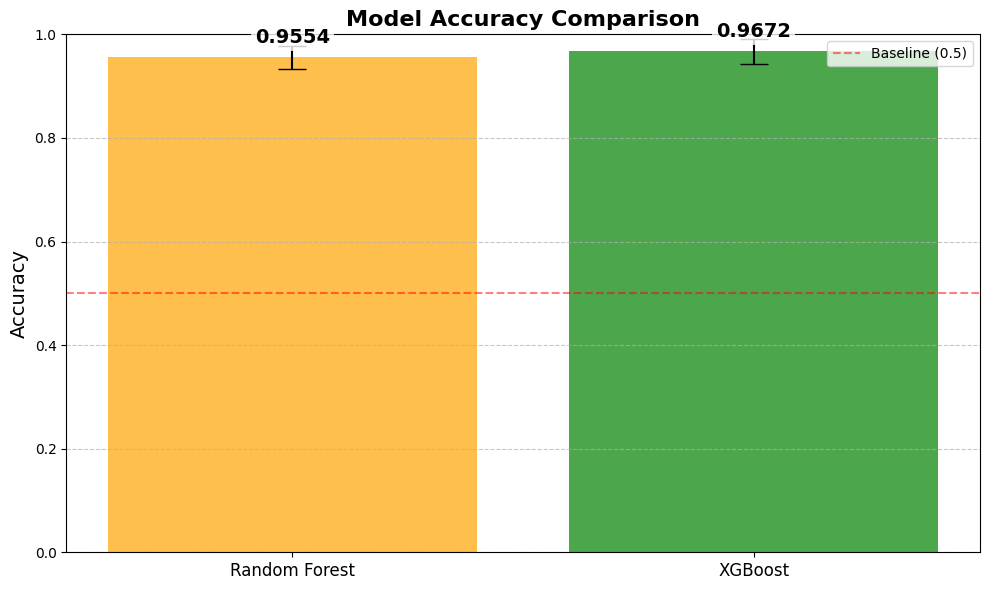

In [64]:
plot_model_accuracy_comparison(rf_results, xgb_results)


In [65]:
def get_most_common_params(param_lists):
    # Count parameter occurrences
    param_counts = {}
    
    for params in param_lists:
        param_tuple = tuple(sorted(params.items()))
        if param_tuple not in param_counts:
            param_counts[param_tuple] = 0
        param_counts[param_tuple] += 1
    
    # Get most common parameter combination
    most_common_params = dict(max(param_counts.items(), key=lambda x: x[1])[0])
    return most_common_params

In [66]:
rf_best_params = get_most_common_params(rf_results['best_params'])
xgb_best_params = get_most_common_params(xgb_results['best_params'])

print("\nBest Random Forest parameters:", rf_best_params)
print("Best XGBoost parameters:", xgb_best_params)



Best Random Forest parameters: {'classifier__max_depth': 7, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best XGBoost parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}


In [67]:
# Train final models with the best parameters
final_rf_pipeline = rf_pipeline.set_params(**rf_best_params)
final_xgb_pipeline = xgb_pipeline.set_params(**xgb_best_params)


In [68]:
final_rf_pipeline.fit(X_train, y_train)
final_xgb_pipeline.fit(X_train, y_train)


C:\Users\Maryl\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:53:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, min_samples_leaf=2,
                               min_samples_split=2, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, ...))])

In [69]:
# Make predictions on the test set (as in your original code)
y_pred_rf = final_rf_pipeline.predict(X_test)
y_pred_xgb = final_xgb_pipeline.predict(X_test)


In [70]:
y_pred_rf_proba = final_rf_pipeline.predict_proba(X_test)[:, 1]  # Get probs for class 1
y_pred_xgb_proba = final_xgb_pipeline.predict_proba(X_test)[:, 1]  # Get probs for class 1

In [71]:
threshold = 0.5
y_pred_rf_binary = (y_pred_rf_proba >= threshold).astype(int)
y_pred_xgb_binary = (y_pred_xgb_proba >= threshold).astype(int)

In [72]:
y_pred_rf_binary

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [73]:
y_pred_xgb_binary

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0])

In [74]:
from sklearn.metrics import accuracy_score, classification_report

print("\nRandom Forest Test Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_binary):.4f}")
print(classification_report(y_test, y_pred_rf_binary))

print("\nXGBoost Test Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb_binary):.4f}")
print(classification_report(y_test, y_pred_xgb_binary))


Random Forest Test Results:
Accuracy: 0.9720
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143


XGBoost Test Results:
Accuracy: 0.9580
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.94      0.94      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [75]:
print("\nRandom Forest (first 10):")
for prob, binary in zip(y_pred_rf_proba[:10], y_pred_rf_binary[:10]):
    print(f"Probability: {prob:.4f}, Class: {binary}")

print("\nXGBoost (first 10):")
for prob, binary in zip(y_pred_xgb_proba[:10], y_pred_xgb_binary[:10]):
    print(f"Probability: {prob:.4f}, Class: {binary}")


Random Forest (first 10):
Probability: 0.0312, Class: 0
Probability: 1.0000, Class: 1
Probability: 1.0000, Class: 1
Probability: 0.0003, Class: 0
Probability: 0.0000, Class: 0
Probability: 0.9991, Class: 1
Probability: 1.0000, Class: 1
Probability: 0.9100, Class: 1
Probability: 0.6050, Class: 1
Probability: 0.0021, Class: 0

XGBoost (first 10):
Probability: 0.0260, Class: 0
Probability: 0.9990, Class: 1
Probability: 0.9968, Class: 1
Probability: 0.0020, Class: 0
Probability: 0.0005, Class: 0
Probability: 0.9985, Class: 1
Probability: 0.9980, Class: 1
Probability: 0.9412, Class: 1
Probability: 0.7244, Class: 1
Probability: 0.0027, Class: 0


In [76]:
# def evaluate_model_with_cv(model, X, y):
#     scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
#     print(f"{model.named_steps['classifier'].__class__.__name__} Accuracy (CV): {scores.mean():.4f}")
#     return scores

In [77]:
# from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

# rf_cv_scores = evaluate_model_with_cv(rf_pipeline, X, y)
# xgb_cv_scores = evaluate_model_with_cv(xgb_pipeline, X, y)

In [78]:
# plt.figure(figsize=(10, 5))
# sns.boxplot(data=[rf_cv_scores, xgb_cv_scores], palette=['blue', 'orange'])
# plt.xticks([0, 1], ['Random Forest', 'XGBoost'])
# plt.title("Model Performance Comparison (CV)")
# plt.ylabel("Accuracy")
# plt.show()

In [79]:
# print("XGBoost CV scores:", xgb_cv_scores)
# print("XGBoost min score:", min(xgb_cv_scores))
# print("XGBoost min score:", max(xgb_cv_scores))
# print("XGBoost quartiles:", np.percentile(xgb_cv_scores, [25, 50, 75]))

In [80]:
# print("Random Forest CV scores:", rf_cv_scores)
# print("Random Forest min score:", min(rf_cv_scores))
# print("Random Forest max score:", max(rf_cv_scores))
# print("Random Forest quartiles:", np.percentile(rf_cv_scores, [25, 50, 75]))

In [81]:
# rf_pipeline.fit(X_train, y_train)
# xgb_pipeline.fit(X_train, y_train)


In [82]:
# y_pred_rf = rf_pipeline.predict(X_test)
# y_pred_xgb = xgb_pipeline.predict(X_test)

In [83]:
# y_pred_rf_proba = rf_pipeline.predict_proba(X_test)[:, 1]  # Get probs for class 1
# y_pred_xgb_proba = xgb_pipeline.predict_proba(X_test)[:, 1]  # Get probs for class 1


In [84]:
# threshold = 0.5
# y_pred_rf_binary = (y_pred_rf_proba >= threshold).astype(int)
# y_pred_xgb_binary = (y_pred_xgb_proba >= threshold).astype(int)


In [85]:
# print("Random Forest (first 10) :")
# for prob, binary in zip(y_pred_rf_proba[:10], y_pred_rf_binary[:10]):
#     print(f"Probability: {prob:.4f}, Class: {binary}")

# print("\nXGBoost (first 10):")
# for prob, binary in zip(y_pred_xgb_proba[:10], y_pred_xgb_binary[:10]):
#     print(f"Probability: {prob:.4f}, Class: {binary}")

In [86]:
from sklearn.metrics import log_loss
rf_loss = log_loss(y_test, y_pred_rf_binary)

# Calculate log loss for XGBoost model
xgb_loss = log_loss(y_test, y_pred_xgb_binary)

print(f"Random Forest Log Loss: {rf_loss:.4f}")
print(f"XGBoost Log Loss: {xgb_loss:.4f}")

Random Forest Log Loss: 1.0082
XGBoost Log Loss: 1.5123


In [87]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf_binary):.4f}")
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb_binary):.4f}")

# Detailed classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_binary))

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb_binary))

# Confusion matrices
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_binary))

print("\nXGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_binary))

Random Forest Accuracy: 0.9720
XGBoost Accuracy: 0.9580

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.94      0.94      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143


Random Forest Confusion Matrix:
[[88  1]
 [ 3 51]]

XGBoost Confusion Matrix:
[[86  3]
 [ 3 51]]


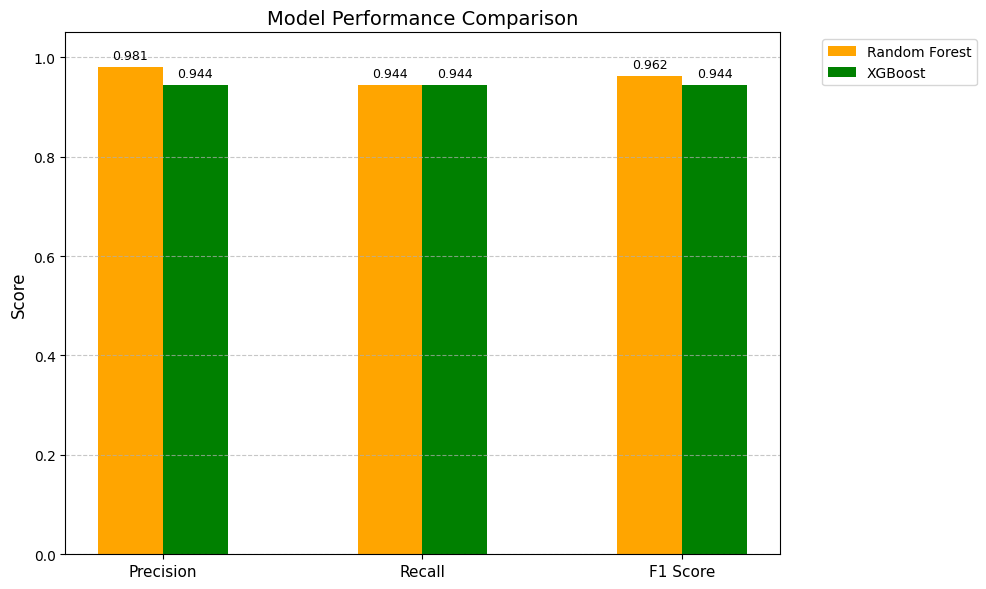

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics for both models
rf_precision = precision_score(y_test, y_pred_rf_binary)
rf_recall = recall_score(y_test, y_pred_rf_binary)
rf_f1 = f1_score(y_test, y_pred_rf_binary)

xgb_precision = precision_score(y_test, y_pred_xgb_binary)
xgb_recall = recall_score(y_test, y_pred_xgb_binary)
xgb_f1 = f1_score(y_test, y_pred_xgb_binary)

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Set width of bars
barWidth = 0.25
positions1 = np.arange(3)
positions2 = [x + barWidth for x in positions1]

# Create bars
rf_bars = ax.bar(positions1, [rf_precision, rf_recall, rf_f1], barWidth, 
                 color='orange', label='Random Forest')
xgb_bars = ax.bar(positions2, [xgb_precision, xgb_recall, xgb_f1], barWidth,
                  color='green', label='XGBoost')

# Add values on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

add_labels(rf_bars)
add_labels(xgb_bars)

# Customize plot
ax.set_ylim(0, 1.05)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Performance Comparison', fontsize=14)
ax.set_xticks([r + barWidth/2 for r in range(3)])
ax.set_xticklabels(['Precision', 'Recall', 'F1 Score'], fontsize=11)
ax.legend(fontsize=11)

# Move the legend to a different location
# ax.legend(loc='lower right')  # or 'upper right', 'lower left', etc.

# Alternatively, place the legend outside the plot area
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [89]:
print(f"XGBoost Precision: {xgb_precision:.6f}")
print(f"XGBoost Recall: {xgb_recall:.6f}")
print(f"XGBoost F1: {xgb_f1:.6f}")

XGBoost Precision: 0.944444
XGBoost Recall: 0.944444
XGBoost F1: 0.944444


In [90]:
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_binary))

XGBoost Confusion Matrix:
[[86  3]
 [ 3 51]]


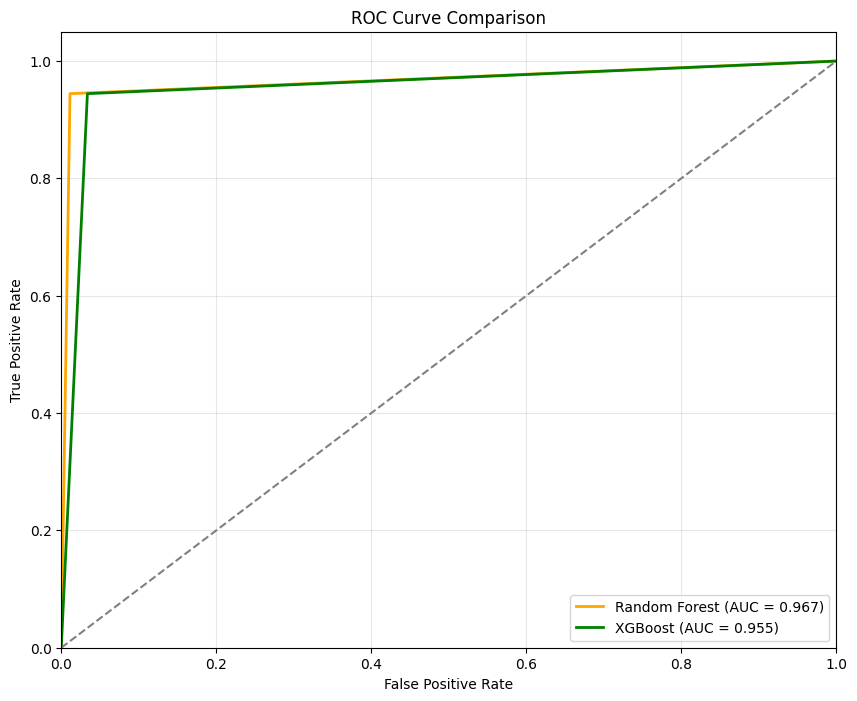

In [91]:
from sklearn.metrics import roc_curve, auc

rf_probs = final_rf_pipeline.predict_proba(X_test)[:, 1]
xgb_probs = final_xgb_pipeline.predict_proba(X_test)[:, 1]

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, y_pred_rf_binary)
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test,y_pred_xgb_binary)

rf_auc = auc(rf_fpr, rf_tpr)
xgb_auc = auc(xgb_fpr, xgb_tpr)

plt.figure(figsize=(10, 8))
plt.plot(rf_fpr, rf_tpr, color='orange', lw=2, 
         label=f'Random Forest (AUC = {rf_auc:.3f})')
plt.plot(xgb_fpr, xgb_tpr, color='green', lw=2, 
         label=f'XGBoost (AUC = {xgb_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

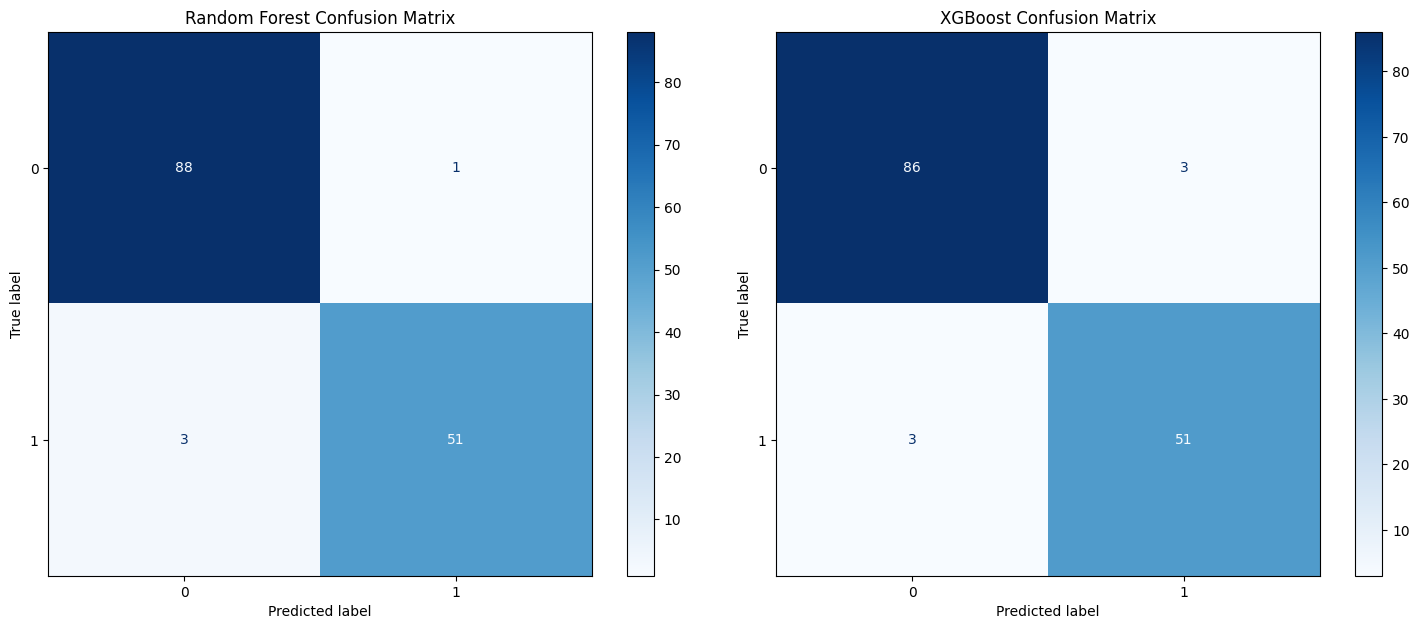

In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot Random Forest confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf_binary)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(ax=ax1, cmap='Blues', values_format='d')
ax1.set_title('Random Forest Confusion Matrix')

# Plot XGBoost confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb_binary)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot(ax=ax2, cmap='Blues', values_format='d')
ax2.set_title('XGBoost Confusion Matrix')

plt.tight_layout()
plt.show()

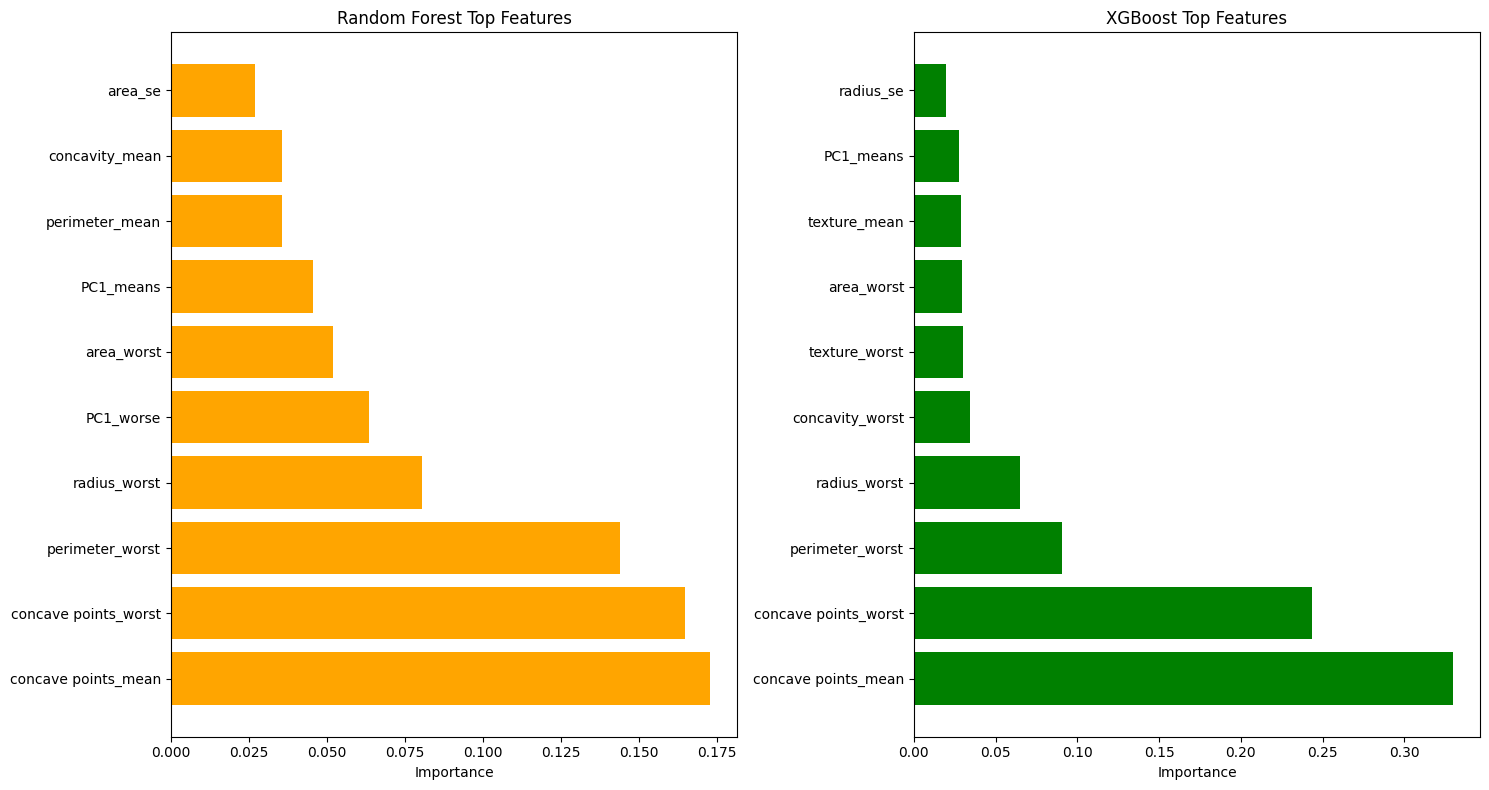

In [93]:
# Get feature importances
rf_importances = final_rf_pipeline.named_steps['classifier'].feature_importances_
xgb_importances = final_xgb_pipeline.named_steps['classifier'].feature_importances_

# Get feature names (adjust according to your dataset)
feature_names = X.columns

# Sort feature indices by importance
sorted_rf_idx = rf_importances.argsort()[::-1]
sorted_xgb_idx = xgb_importances.argsort()[::-1]

# Take top 10 features for each model
top_n = 10
top_rf_features = feature_names[sorted_rf_idx][:top_n]
top_xgb_features = feature_names[sorted_xgb_idx][:top_n]

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Random Forest feature importance
ax1.barh(range(top_n), rf_importances[sorted_rf_idx][:top_n], color='orange')
ax1.set_yticks(range(top_n))
ax1.set_yticklabels(top_rf_features)
ax1.set_title('Random Forest Top Features')
ax1.set_xlabel('Importance')

# XGBoost feature importance
ax2.barh(range(top_n), xgb_importances[sorted_xgb_idx][:top_n], color='green')
ax2.set_yticks(range(top_n))
ax2.set_yticklabels(top_xgb_features)
ax2.set_title('XGBoost Top Features')
ax2.set_xlabel('Importance')

plt.tight_layout()
plt.show()

C:\Users\Maryl\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


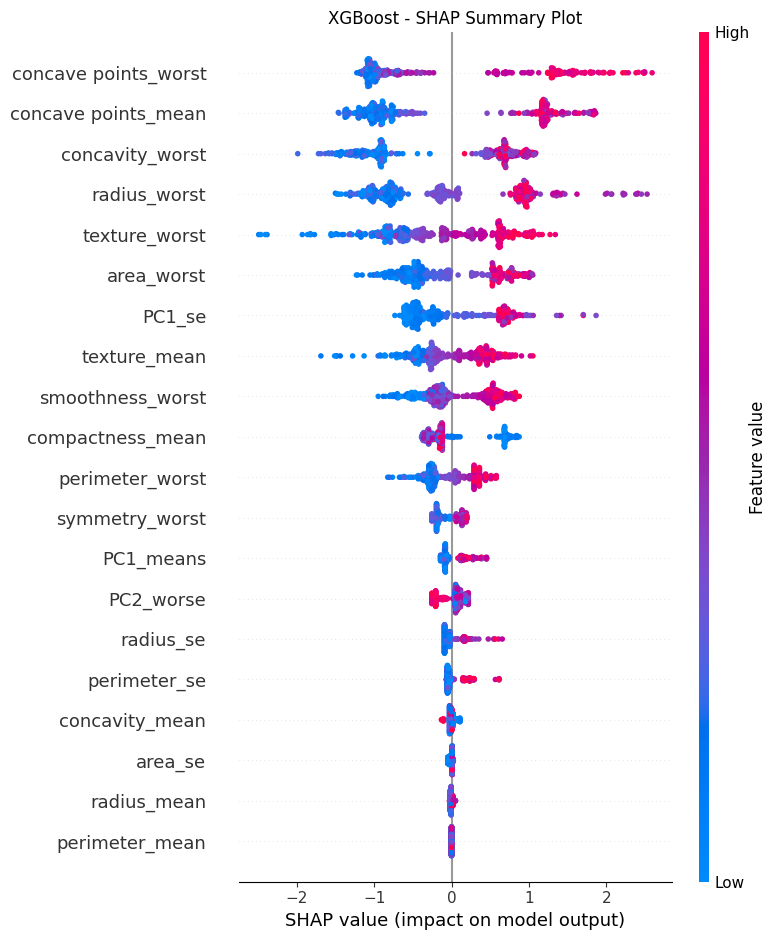

<Figure size 640x480 with 0 Axes>

In [94]:
import shap

X_train_processed_xgb = final_xgb_pipeline.named_steps['preprocessor'].transform(X_train)
if hasattr(X_train_processed_xgb, "toarray"):
    X_train_processed_xgb = X_train_processed_xgb.toarray()

# Step 2: Get SHAP values
xgb_model = final_xgb_pipeline.named_steps['classifier']
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_train_processed_xgb)

# Step 3: Get original feature names from X_train
feature_names = X_train.columns.tolist()

# Step 4: Create the plot with actual feature names
plt.figure(figsize=(10, 8))
plt.title("XGBoost - SHAP Summary Plot")
shap.summary_plot(shap_values_xgb, X_train_processed_xgb, feature_names=feature_names)
plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

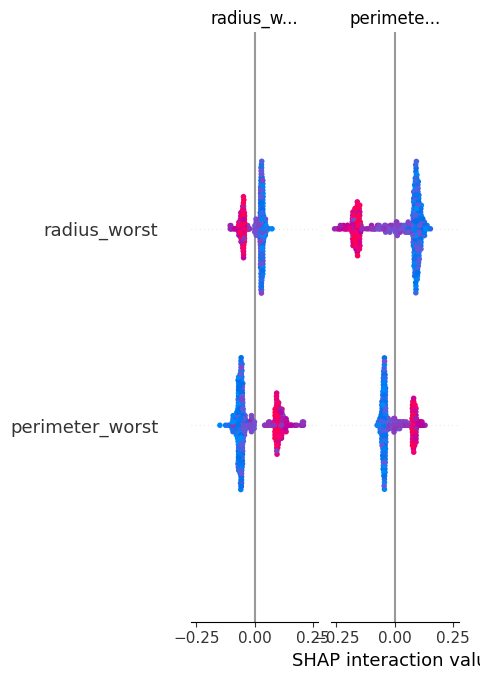

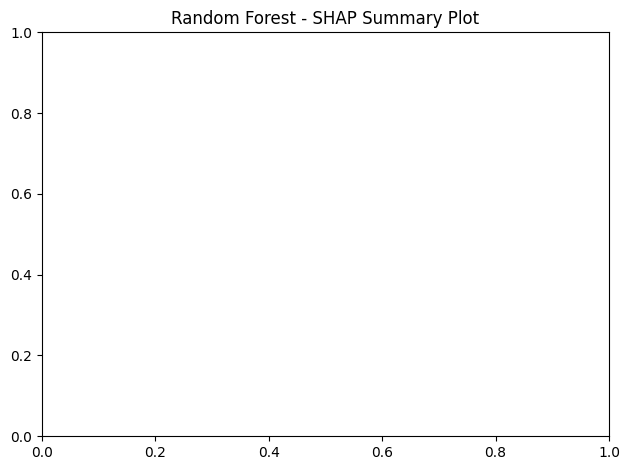

In [95]:
# Step 1: Process the data through the preprocessor first
X_train_processed = final_rf_pipeline.named_steps['preprocessor'].transform(X_train)

# Step 2: Convert to dense array if it's sparse
if hasattr(X_train_processed, "toarray"):
    X_train_processed = X_train_processed.toarray()

# Step 3: Get the trained model from the pipeline
rf_model = final_rf_pipeline.named_steps['classifier']

# Step 4: Create the explainer and get SHAP values
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_train_processed)

# Step 5: Create feature names if possible
try:
    feature_names = final_rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
except:
    feature_names = [f'feature_{i}' for i in range(X_train_processed.shape[1])]

# Step 6: Create the summary plot
plt.figure(figsize=(20, 20))
# For classification, we typically want the positive class (index 1)
if isinstance(shap_values_rf, list):
    # This means it's a multi-class problem - use class 1 for binary classification
    shap.summary_plot(shap_values_rf[1], X_train_processed, feature_names=feature_names)
else:
    # For regression or single output models
    shap.summary_plot(shap_values_rf, X_train_processed, feature_names=feature_names)

plt.title("Random Forest - SHAP Summary Plot")
plt.tight_layout()
plt.show()